In [70]:
# Import des bibliothèques essentielles
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuration pour un meilleur affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

# Chargement du dataset
df = pd.read_csv('babyfoot_dataset.csv')

# Première vue d'ensemble
print("🎯 INFORMATIONS GÉNÉRALES SUR LE DATASET")
print("="*50)
print(f"Nombre de lignes : {df.shape[0]}")
print(f"Nombre de colonnes : {df.shape[1]}")
print("\n📊 Premières lignes du dataset :")
df.head()


🎯 INFORMATIONS GÉNÉRALES SUR LE DATASET
Nombre de lignes : 100200
Nombre de colonnes : 35

📊 Premières lignes du dataset :


,game_id,game_date,location,table_id,table_condition,ball_type,music_playing,referee,game_duration,final_score_red,final_score_blue,winner,attendance_count,season,recorded_by,rating_raw,player_id,player_name,player_canonical_name,player_age,player_role,player_goals,player_own_goals,player_assists,player_saves,possession_time,mood,player_comment,team_color,is_substitute,ping_ms,notes,duplicate_flag,misc,created_at
0,G015295,Feb 06st 2023,Ynov Toulouse,T05,beer stains,NaN,Spotify: Queen - We Will Rock You,Paul Kim,12.45,0,4.0,Blue,8,2023/2024,camera,2,P0382,Juli3 Mor3au,Julie Moreau,twenty,defence,0,0,4,3,9:36,1,ref biased,Red,yes,185,injured,NaN,NaN,2025-10-02T10:41:54
1,G023800,24-03-2023,Cafeteria (1st floor),T07,worn,NaN,Indie playlist,NaN,8.57,10,7.0,red,5,Season 24-25,admin,3,P0356,mohamed philippe,Mohamed Philippe,NaN,defense,0,0,2,2,NaN,🙂,NaN,Blue,yes,NaN,NaN,0,-,2025-10-02T10:41:55
2,G023577,2025-01-13,Gym Hall,T26,scratched,NaN,Spotify: Queen - We Will Rock You,Lena Clement,17.2,2,6.0,Bleu,3,2024/2025,Discord Bot,five,P0267,luc rossi,Luc Rossi,21 yrs,ATTACK,2,0,1,1,5.09min,2,NaN,R,no,NaN,double booked,0,NaN,2025-10-02T10:41:55
3,G020644,Nov 11 2025,Salle Polyvalente,T21,worn,mini ball,EDM mix,Isabella Girard,5.18,6,9.0,Blue,4 players,2024/2025,player phone,5,P0208,Morgan R.,Morgan Rossi,21 yrs,def,0,0,5,1,NaN,3,team spirit high,B,maybe,NaN,double booked,NaN,-,2025-10-02T10:41:54
4,G011677,30 Sep 23,Campus - Cafeteria,T26,missing screw,trainer ball,Oldies 80s,yes,6min,3,10.0,blue,2,2025 Season,GoPro,1,P0027,Cas3y Kim,Casey Kim,26,attck,0,0,5,8,177,😂,rage quit,Red,yes,NaN,NaN,NaN,NaN,2025-10-02T10:41:54


In [71]:
# Examen des types de données et des valeurs manquantes
print("\n📋 STRUCTURE DU DATASET")
print("="*50)
print("\nTypes de données par colonne :")
print(df.dtypes)

print("\n🔍 ANALYSE DES VALEURS MANQUANTES")
print("="*50)
missing_summary = pd.DataFrame({
    'Colonne': df.columns,
    'Type': df.dtypes,
    'Valeurs_manquantes': df.isnull().sum(),
    'Pourcentage_manquant': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_summary = missing_summary[missing_summary['Valeurs_manquantes'] > 0].sort_values('Valeurs_manquantes', ascending=False)
print(missing_summary)

# Aperçu des valeurs uniques pour chaque colonne
print("\n📊 APERÇU DES VALEURS UNIQUES PAR COLONNE")
print("="*50)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"\n{col}: {unique_count} valeurs uniques")
    if unique_count < 20:  # Si peu de valeurs uniques, on les affiche
        print(f"   Valeurs: {df[col].unique()[:10]}")  # Limite à 10 pour la lisibilité


📋 STRUCTURE DU DATASET

Types de données par colonne :
game_id                  object
game_date                object
location                 object
table_id                 object
table_condition          object
ball_type                object
music_playing            object
referee                  object
game_duration            object
final_score_red          object
final_score_blue         object
winner                   object
attendance_count         object
season                   object
recorded_by              object
rating_raw               object
player_id                object
player_name              object
player_canonical_name    object
player_age               object
player_role              object
player_goals             object
player_own_goals         object
player_assists           object
player_saves              int64
possession_time          object
mood                     object
player_comment           object
team_color               object
is_substitute   

In [72]:
print("\n🚨 ANALYSE DES PROBLÈMES DE FORMAT")
print("="*50)

# 1. Analyse des formats de dates
print("\n📅 FORMATS DE DATES (game_date) :")
print("-"*30)
# Échantillon des différents formats de dates
date_sample = df['game_date'].dropna().sample(min(20, len(df)))
for date in date_sample:
    print(f"  - {date}")

# 2. Analyse des formats de durée
print("\n⏱️ FORMATS DE DURÉE (game_duration) :")
print("-"*30)
duration_formats = df['game_duration'].dropna().unique()[:15]
for duration in duration_formats:
    print(f"  - {duration}")

# 3. Analyse des couleurs d'équipe
print("\n🎨 VARIANTES DE COULEURS D'ÉQUIPE :")
print("-"*30)
print("Couleur gagnante (winner):", df['winner'].unique())
print("Couleur équipe (team_color):", df['team_color'].unique())

# 4. Analyse des valeurs booléennes
print("\n✅ FORMATS BOOLÉENS (is_substitute) :")
print("-"*30)
print(df['is_substitute'].unique())

# 5. Analyse des ratings
print("\n⭐ FORMATS DE RATING :")
print("-"*30)
print(df['rating_raw'].unique()[:10])

# 6. Problèmes d'encodage (emojis)
print("\n😊 COLONNES AVEC EMOJIS/CARACTÈRES SPÉCIAUX :")
print("-"*30)
print("Mood:", df['mood'].unique()[:10])


🚨 ANALYSE DES PROBLÈMES DE FORMAT

📅 FORMATS DE DATES (game_date) :
------------------------------
  - 02/27/2025
  - 18-05-2023
  - 02/18/2024
  - 2024-02-05
  - 29-05-2023
  - 07/03/2025
  - 11/05/2023
  - 2023-11-12
  - 2024/06/03
  - Jan 14 2023
  - 27-03-2024
  - 2023/02/20
  - Feb 05 2023
  - 11/19/2025
  - 2023/10/14
  - 01 Aug 24
  - Dec 14 2024
  - 15/06/25
  - Apr 14 2023
  - 30-10-2023

⏱️ FORMATS DE DURÉE (game_duration) :
------------------------------
  - 12.45
  - 8.57
  - 17.2
  - 5.18
  - 6min
  - 5min
  - 18min
  - 00:08:11
  - 14.62
  - 16.11
  - 12min
  - 18.27
  - 7.28
  - 00:38:24
  - 15min

🎨 VARIANTES DE COULEURS D'ÉQUIPE :
------------------------------
Couleur gagnante (winner): ['Blue' 'red' 'Bleu' 'blue' 'Red' nan 'R' 'B' 'BLUE' 'Rouge' 'draw' 'TIE'
 'RED' 'tie' 'RED�' 'Rouge�']
Couleur équipe (team_color): ['Red' 'Blue' 'R' 'B' '🔴' '🔵' 'blue' 'red' 'Red�' 'Blue�']

✅ FORMATS BOOLÉENS (is_substitute) :
------------------------------
['yes' 'no' 'maybe' nan 

In [73]:
print("\n📝 DOCUMENTATION COMPLÈTE DES PROBLÈMES IDENTIFIÉS")
print("="*70)

# Créons un dictionnaire structuré des problèmes
problemes_identifies = {
    "game_date": {
        "problème": "Formats multiples de dates",
        "exemples": ["DD/MM/YYYY", "YYYY-MM-DD", "MM/DD/YYYY", "MMM DDst YYYY", "DD MMM YY"],
        "solution_proposée": "Standardiser vers YYYY-MM-DD"
    },
    "game_duration": {
        "problème": "Formats mixtes (décimal, 'min', HH:MM:SS)",
        "exemples": ["12.45", "6min", "00:08:11"],
        "solution_proposée": "Convertir tout en minutes décimales"
    },
    "winner/team_color": {
        "problème": "Variations linguistiques et emojis",
        "exemples": ["Blue/Bleu/B/🔵", "Red/Rouge/R/🔴", "draw/TIE/tie"],
        "solution_proposée": "Standardiser vers 'Red', 'Blue', 'Draw'"
    },
    "is_substitute": {
        "problème": "Texte au lieu de booléen",
        "exemples": ["yes", "no", "maybe", "no�"],
        "solution_proposée": "yes→True, no→False, maybe/nan→None"
    },
    "rating_raw": {
        "problème": "Formats mixtes (nombres, texte, emojis)",
        "exemples": ["2", "five", "👍", "⭐⭐⭐"],
        "solution_proposée": "Convertir tout en échelle numérique 1-5"
    },
    "mood": {
        "problème": "Mélange nombres/emojis/texte",
        "exemples": ["1", "😂", "angry"],
        "solution_proposée": "Créer une échelle numérique cohérente"
    },
    "caractères_corrompus": {
        "problème": "Caractères mal encodés (�)",
        "exemples": ["RED�", "no�"],
        "solution_proposée": "Nettoyer les caractères corrompus"
    }
}

# Affichage structuré
for colonne, details in problemes_identifies.items():
    print(f"\n🔸 {colonne.upper()}")
    print(f"   Problème: {details['problème']}")
    print(f"   Exemples: {', '.join(str(e) for e in details['exemples'])}")
    print(f"   → Solution: {details['solution_proposée']}")

# Analyse additionnelle des anomalies
print("\n\n🔍 ANOMALIES SUPPLÉMENTAIRES DÉTECTÉES")
print("="*50)

# Vérification des noms de joueurs avec caractères spéciaux
print("\n👤 Noms de joueurs avec caractères spéciaux:")
special_names = df[df['player_name'].str.contains(r'[0-9]', na=False)]['player_name'].unique()[:5]
for name in special_names:
    print(f"  - {name}")

# Vérification des âges problématiques
print("\n🎂 Formats d'âge problématiques:")
age_samples = df['player_age'].dropna().unique()[:10]
for age in age_samples:
    print(f"  - {age}")


📝 DOCUMENTATION COMPLÈTE DES PROBLÈMES IDENTIFIÉS

🔸 GAME_DATE
   Problème: Formats multiples de dates
   Exemples: DD/MM/YYYY, YYYY-MM-DD, MM/DD/YYYY, MMM DDst YYYY, DD MMM YY
   → Solution: Standardiser vers YYYY-MM-DD

🔸 GAME_DURATION
   Problème: Formats mixtes (décimal, 'min', HH:MM:SS)
   Exemples: 12.45, 6min, 00:08:11
   → Solution: Convertir tout en minutes décimales

🔸 WINNER/TEAM_COLOR
   Problème: Variations linguistiques et emojis
   Exemples: Blue/Bleu/B/🔵, Red/Rouge/R/🔴, draw/TIE/tie
   → Solution: Standardiser vers 'Red', 'Blue', 'Draw'

🔸 IS_SUBSTITUTE
   Problème: Texte au lieu de booléen
   Exemples: yes, no, maybe, no�
   → Solution: yes→True, no→False, maybe/nan→None

🔸 RATING_RAW
   Problème: Formats mixtes (nombres, texte, emojis)
   Exemples: 2, five, 👍, ⭐⭐⭐
   → Solution: Convertir tout en échelle numérique 1-5

🔸 MOOD
   Problème: Mélange nombres/emojis/texte
   Exemples: 1, 😂, angry
   → Solution: Créer une échelle numérique cohérente

🔸 CARACTÈRES_CORROMPUS

In [74]:
print("\n🧹 PHASE 2 : NETTOYAGE DES DONNÉES")
print("="*50)

# Créer une copie pour le nettoyage
df_clean = df.copy()

# 1. NETTOYAGE DES DATES
print("\n📅 Étape 1 : Standardisation des dates")
print("-"*40)

from dateutil import parser

def clean_date(date_str):
    """Convertit différents formats de dates vers un format standard"""
    if pd.isna(date_str):
        return None
    
    try:
        # Nettoyer les suffixes comme '1st', '2nd', etc.
        date_str = str(date_str).replace('st ', ' ').replace('nd ', ' ').replace('rd ', ' ').replace('th ', ' ')
        
        # Parser la date
        parsed_date = parser.parse(date_str, dayfirst=True)
        return parsed_date
    except:
        print(f"  ⚠️ Impossible de parser: {date_str}")
        return None

# Appliquer le nettoyage
df_clean['game_date_clean'] = df_clean['game_date'].apply(clean_date)

# Vérification
print(f"Dates converties avec succès: {df_clean['game_date_clean'].notna().sum()}/{len(df_clean)}")
print(f"Dates non converties: {df_clean['game_date_clean'].isna().sum()}")

# Afficher quelques exemples
print("\nExemples de conversion:")
sample_dates = df_clean[['game_date', 'game_date_clean']].dropna().sample(5)
for idx, row in sample_dates.iterrows():
    print(f"  {row['game_date']} → {row['game_date_clean'].strftime('%Y-%m-%d')}")


🧹 PHASE 2 : NETTOYAGE DES DONNÉES

📅 Étape 1 : Standardisation des dates
----------------------------------------
  ⚠️ Impossible de parser: 19 Oct 25�
Dates converties avec succès: 100199/100200
Dates non converties: 1

Exemples de conversion:
  17/04/25 → 2025-04-17
  2023-07-13 → 2023-07-13
  19-11-2023 → 2023-11-19
  02-07-2024 → 2024-07-02
  30-09-2024 → 2024-09-30


## Nettoyage de la duree des jeux

In [75]:
# 2. NETTOYAGE DES DURÉES
print("\n\n⏱️ Étape 2 : Standardisation des durées (en minutes)")
print("-"*40)

def clean_duration(duration_str):
    """Convertit différents formats de durée en minutes décimales"""
    if pd.isna(duration_str):
        return None
    
    duration_str = str(duration_str).strip()
    
    try:
        # Format HH:MM:SS
        if ':' in duration_str:
            parts = duration_str.split(':')
            if len(parts) == 3:
                hours, minutes, seconds = map(float, parts)
                return hours * 60 + minutes + seconds / 60
            elif len(parts) == 2:
                minutes, seconds = map(float, parts)
                return minutes + seconds / 60
        
        # Format avec 'min'
        elif 'min' in duration_str.lower():
            return float(duration_str.lower().replace('min', '').strip())
        
        # Format décimal (assumé en minutes)
        else:
            return float(duration_str)
    
    except:
        print(f"  ⚠️ Impossible de parser: {duration_str}")
        return None

# Appliquer le nettoyage
df_clean['game_duration_clean'] = df_clean['game_duration'].apply(clean_duration)

# Vérification
print(f"Durées converties: {df_clean['game_duration_clean'].notna().sum()}/{len(df_clean)}")

# Statistiques sur les durées
print("\nStatistiques des durées (en minutes):")
print(df_clean['game_duration_clean'].describe().round(2))

# Exemples de conversion
print("\nExemples de conversion:")
sample_durations = df_clean[['game_duration', 'game_duration_clean']].dropna().sample(5)
for idx, row in sample_durations.iterrows():
    print(f"  {row['game_duration']} → {row['game_duration_clean']:.2f} minutes")



⏱️ Étape 2 : Standardisation des durées (en minutes)
----------------------------------------
  ⚠️ Impossible de parser: 7.58�
Durées converties: 100199/100200

Statistiques des durées (en minutes):
count    100199.00
mean         17.50
std          12.33
min           5.00
25%           9.57
50%          14.16
75%          19.00
max          59.98
Name: game_duration_clean, dtype: float64

Exemples de conversion:
  12min → 12.00 minutes
  00:58:01 → 58.02 minutes
  00:28:02 → 28.03 minutes
  19.0 → 19.00 minutes
  7min → 7.00 minutes


## nettoyage des couleurs d'équipe

In [76]:
# 3. NETTOYAGE DES COULEURS D'ÉQUIPE
print("\n\n🎨 Étape 3 : Standardisation des couleurs")
print("-"*40)

def clean_color(color_str):
    """Standardise les couleurs vers Red, Blue ou Draw"""
    if pd.isna(color_str):
        return None
    
    color_str = str(color_str).strip().lower()
    
    # Supprimer les caractères corrompus
    color_str = color_str.replace('�', '')
    
    # Mapping des couleurs
    if color_str in ['red', 'rouge', 'r', '🔴']:
        return 'Red'
    elif color_str in ['blue', 'bleu', 'b', '🔵']:
        return 'Blue'
    elif color_str in ['draw', 'tie', '']:
        return 'Draw'
    else:
        
        return None

# Nettoyer winner et team_color
df_clean['winner_clean'] = df_clean['winner'].apply(clean_color)
df_clean['team_color_clean'] = df_clean['team_color'].apply(clean_color)

# Vérification
print(f"\nRésultats du nettoyage:")
print(f"Winner - Valeurs uniques: {df_clean['winner_clean'].unique()}")
print(f"Team_color - Valeurs uniques: {df_clean['team_color_clean'].unique()}")

# 4. NETTOYAGE DES BOOLÉENS
print("\n\n✅ Étape 4 : Conversion des booléens (is_substitute)")
print("-"*40)

def clean_boolean(bool_str):
    """Convertit yes/no/maybe en True/False/None"""
    if pd.isna(bool_str):
        return None
    
    bool_str = str(bool_str).strip().lower().replace('�', '')
    
    if bool_str in ['yes', '1', 'true']:
        return True
    elif bool_str in ['no', '0', 'false']:
        return False
    elif bool_str == 'maybe':
        return None  # Incertain
    else:
        print(f"  ⚠️ Valeur booléenne non reconnue: {bool_str}")
        return None

df_clean['is_substitute_clean'] = df_clean['is_substitute'].apply(clean_boolean)

# Vérification
print(f"Valeurs après conversion:")
print(df_clean['is_substitute_clean'].value_counts(dropna=False))



🎨 Étape 3 : Standardisation des couleurs
----------------------------------------

Résultats du nettoyage:
Winner - Valeurs uniques: ['Blue' 'Red' None 'Draw']
Team_color - Valeurs uniques: ['Red' 'Blue']


✅ Étape 4 : Conversion des booléens (is_substitute)
----------------------------------------
Valeurs après conversion:
is_substitute_clean
None     50131
True     25339
False    24730
Name: count, dtype: int64


##  nettoyage des ratings et des moods

In [77]:
# 5. NETTOYAGE DES RATINGS
print("\n\n⭐ Étape 5 : Standardisation des ratings (échelle 1-5)")
print("-"*40)

def clean_rating(rating_str):
    """Convertit différents formats de rating vers échelle 1-5"""
    if pd.isna(rating_str):
        return None
    
    rating_str = str(rating_str).strip().lower()
    
    # Mapping des différents formats
    rating_map = {
        '1': 1, 'one': 1, '⭐': 1, '😡': 1,
        '2': 2, 'two': 2, '⭐⭐': 2,
        '3': 3, 'three': 3, '⭐⭐⭐': 3,
        '4': 4, 'four': 4, '⭐⭐⭐⭐': 4, '👍': 4,
        '5': 5, 'five': 5, '⭐⭐⭐⭐⭐': 5,
        '👍': 4,  # Pouce en l'air = bon = 4
    }
    
    if rating_str in rating_map:
        return rating_map[rating_str]
    else:
        # Tenter de parser comme nombre
        try:
            rating = int(rating_str)
            if 1 <= rating <= 5:
                return rating
        except:
            pass
        # print(f"  ⚠️ Rating non reconnu: {rating_str}")
        return None

df_clean['rating_clean'] = df_clean['rating_raw'].apply(clean_rating)

# Vérification
print(f"Distribution des ratings nettoyés:")
print(df_clean['rating_clean'].value_counts().sort_index())

# 6. NETTOYAGE DES MOODS
print("\n\n😊 Étape 6 : Conversion des moods (échelle 1-5)")
print("-"*40)

def clean_mood(mood_str):
    """Convertit moods en échelle numérique 1-5 (1=très négatif, 5=très positif)"""
    if pd.isna(mood_str):
        return None
    
    mood_str = str(mood_str).strip().lower()
    
    # Mapping émotionnel
    mood_map = {
        '😡': 1, 'angry': 1, '1': 1,  # Très négatif
        '😔': 2, '2': 2,               # Négatif
        '😐': 3, '🙂': 3, '3': 3,      # Neutre
        '😊': 4, 'happy': 4, '4': 4,   # Positif
        '😂': 5, '5': 5                # Très positif
    }
    
    if mood_str in mood_map:
        return mood_map[mood_str]
    else:
        # Tenter de parser comme nombre
        try:
            mood = int(mood_str)
            if 1 <= mood <= 5:
                return mood
        except:
            pass
        print(f"  ⚠️ Mood non reconnu: {mood_str}")
        return None

df_clean['mood_clean'] = df_clean['mood'].apply(clean_mood)

print(f"Distribution des moods nettoyés:")
print(df_clean['mood_clean'].value_counts().sort_index())



⭐ Étape 5 : Standardisation des ratings (échelle 1-5)
----------------------------------------
Distribution des ratings nettoyés:
rating_clean
1.0    18896
2.0     9147
3.0    17760
4.0    27330
5.0    18092
Name: count, dtype: int64


😊 Étape 6 : Conversion des moods (échelle 1-5)
----------------------------------------
Distribution des moods nettoyés:
mood_clean
1.0    33580
2.0    11163
3.0    22020
4.0    11157
5.0    11050
Name: count, dtype: int64


## nettoyage des noms de joueurs et des âges

In [78]:
# 7. NETTOYAGE DES NOMS DE JOUEURS
print("\n\n👤 Étape 7 : Nettoyage des noms de joueurs")
print("-"*40)

def clean_player_name(name):
    """Nettoie les noms de joueurs (supprime chiffres et normalise)"""
    if pd.isna(name):
        return None
    
    # Remplacer les chiffres par des lettres équivalentes
    replacements = {
        '3': 'e', '1': 'i', '0': 'o', '4': 'a', '5': 's'
    }
    
    clean_name = str(name)
    for old, new in replacements.items():
        clean_name = clean_name.replace(old, new)
    
    # Normaliser la casse (Prénom Nom)
    clean_name = ' '.join(word.capitalize() for word in clean_name.split())
    
    return clean_name

df_clean['player_name'] = df_clean['player_name'].apply(clean_player_name)

# Afficher quelques exemples de nettoyage
print("Exemples de nettoyage des noms:")
name_changes = df_clean[df_clean['player_name'] != df_clean['player_name']][['player_name', 'player_name']].dropna().head(5)
for idx, row in name_changes.iterrows():
    print(f"  {row['player_name']} → {row['player_name']}")

# 8. NETTOYAGE DES ÂGES
print("\n\n🎂 Étape 8 : Conversion des âges en numérique")
print("-"*40)

def clean_age(age_str):
    """Extrait l'âge numérique depuis différents formats"""
    if pd.isna(age_str):
        return None
    
    age_str = str(age_str).strip()
    
    # Extraire les nombres
    import re
    numbers = re.findall(r'\d+', age_str)
    
    if numbers:
        age = int(numbers[0])
        # Validation de l'âge (entre 10 et 80 ans)
        if 10 <= age <= 80:
            return age
        else:
            print(f"  ⚠️ Âge suspect: {age} (depuis '{age_str}')")
            return None
    else:
        # Cas spéciaux
        age_words = {
            'twenty': 20, 'thirty': 30, 'forty': 40,
            'vingt': 20, 'trente': 30, 'quarante': 40
        }
        for word, value in age_words.items():
            if word in age_str.lower():
                return value
        
        print(f"  ⚠️ Impossible d'extraire l'âge: {age_str}")
        return None

df_clean['player_age_clean'] = df_clean['player_age'].apply(clean_age)

# Statistiques sur les âges
print(f"\nStatistiques des âges nettoyés:")
print(df_clean['player_age_clean'].describe().round(1))

print(f"\nDistribution des âges:")
age_distribution = df_clean['player_age_clean'].value_counts().sort_index()
print(age_distribution.head(10))



👤 Étape 7 : Nettoyage des noms de joueurs
----------------------------------------
Exemples de nettoyage des noms:


🎂 Étape 8 : Conversion des âges en numérique
----------------------------------------

Statistiques des âges nettoyés:
count    60313.0
mean        23.8
std          6.9
min         16.0
25%         20.0
50%         21.0
75%         23.0
max         45.0
Name: player_age_clean, dtype: float64

Distribution des âges:
player_age_clean
16.0      671
17.0      675
18.0      707
19.0      645
20.0    20766
21.0    20664
22.0      677
23.0      703
24.0      655
25.0      650
Name: count, dtype: int64


## nettoyage des dernières colonnes et création des variables dérivées

In [79]:
# 9. CONVERSION DES SCORES EN NUMÉRIQUE
print("\n\n⚽ Étape 9 : Conversion des scores en numérique")
print("-"*40)

# Convertir les scores en numérique
df_clean['final_score_red'] = pd.to_numeric(df_clean['final_score_red'], errors='coerce')
df_clean['final_score_blue'] = pd.to_numeric(df_clean['final_score_blue'], errors='coerce')

print(f"Scores rouges convertis: {df_clean['final_score_red'].notna().sum()}")
print(f"Scores bleus convertis: {df_clean['final_score_blue'].notna().sum()}")

# 10. NETTOYAGE DES TEMPS DE POSSESSION
print("\n\n⏱️ Étape 10 : Nettoyage des temps de possession")
print("-"*40)

def clean_possession_time(time_str):
    """Convertit le temps de possession en secondes"""
    if pd.isna(time_str):
        return None
    
    time_str = str(time_str).strip()
    
    try:
        # Format MM:SS
        if ':' in time_str:
            parts = time_str.split(':')
            if len(parts) == 2:
                minutes, seconds = map(float, parts)
                return minutes * 60 + seconds
        
        # Format avec 'min'
        elif 'min' in time_str.lower():
            minutes = float(time_str.lower().replace('min', '').strip())
            return minutes * 60
        
        # Juste un nombre (assumé en secondes)
        else:
            return float(time_str)
    
    except:
        print(f"  ⚠️ Impossible de parser: {time_str}")
        return None

df_clean['possession_time_seconds'] = df_clean['possession_time'].apply(clean_possession_time)

# 11. CRÉATION DE VARIABLES DÉRIVÉES (VERSION CORRIGÉE)
print("\n\n🔧 Étape 11 : Création de variables dérivées")
print("-"*40)

# Maintenant on peut calculer la marge de victoire
df_clean['victory_margin'] = abs(df_clean['final_score_red'] - df_clean['final_score_blue'])

# Total de buts dans le match
df_clean['total_goals'] = df_clean['final_score_red'] + df_clean['final_score_blue']

# Extraire composantes temporelles de game_date_clean
df_clean['game_year'] = df_clean['game_date_clean'].dt.year
df_clean['game_month'] = df_clean['game_date_clean'].dt.month
df_clean['game_day_of_week'] = df_clean['game_date_clean'].dt.dayofweek  # 0=Lundi, 6=Dimanche

# Pour l'heure, utilisons errors='coerce' pour gérer les caractères corrompus
try:
    df_clean['created_at_clean'] = pd.to_datetime(df_clean['created_at'], errors='coerce')
    df_clean['game_hour'] = df_clean['created_at_clean'].dt.hour
    print(f"  - Heures extraites: {df_clean['game_hour'].notna().sum()} valeurs")
except:
    print("  - ⚠️ Impossible d'extraire les heures depuis created_at")
    df_clean['game_hour'] = None

# Indicateur de match nul
df_clean['is_draw'] = df_clean['winner_clean'] == 'Draw'

# Performance offensive (buts par minute de jeu)
# D'abord convertir player_goals en numérique
df_clean['player_goals'] = pd.to_numeric(df_clean['player_goals'], errors='coerce')
df_clean['player_assists'] = pd.to_numeric(df_clean['player_assists'], errors='coerce')
df_clean['player_saves'] = pd.to_numeric(df_clean['player_saves'], errors='coerce')
df_clean['player_own_goals'] = pd.to_numeric(df_clean['player_own_goals'], errors='coerce')

df_clean['goals_per_minute'] = df_clean['player_goals'] / df_clean['game_duration_clean']
df_clean['goals_per_minute'] = df_clean['goals_per_minute'].replace([np.inf, -np.inf], np.nan)

# 12. RÉSUMÉ FINAL DU NETTOYAGE
print("\n\n📊 RÉSUMÉ FINAL DU NETTOYAGE")
print("="*50)

print("\n🔍 Colonnes nettoyées:")
colonnes_nettoyees = {
    'game_date': 'game_date_clean',
    'game_duration': 'game_duration_clean', 
    'winner': 'winner_clean',
    'team_color': 'team_color_clean',
    'is_substitute': 'is_substitute_clean',
    'rating_raw': 'rating_clean',
    'mood': 'mood_clean',
    'player_name': 'player_name',
    'player_age': 'player_age_clean'
}

for original, clean in colonnes_nettoyees.items():
    original_count = df_clean[original].notna().sum()
    clean_count = df_clean[clean].notna().sum()
    if original_count > 0:
        taux = clean_count/original_count*100
        print(f"  {original}: {clean_count}/{original_count} ({taux:.1f}%)")

print("\n📈 Variables dérivées créées:")
variables_derivees = ['victory_margin', 'total_goals', 'game_year', 'game_month', 
                     'game_day_of_week', 'is_draw', 'goals_per_minute']
for var in variables_derivees:
    if var in df_clean.columns:
        count = df_clean[var].notna().sum()
        print(f"  - {var}: {count} valeurs")

# Sauvegarder le dataset nettoyé
df_clean.to_csv('babyfoot_dataset_clean.csv', index=False)
print(f"\n✅ Dataset nettoyé sauvegardé!")
print(f"   Colonnes totales: {len(df_clean.columns)} (originales: {len(df.columns)})")



⚽ Étape 9 : Conversion des scores en numérique
----------------------------------------
Scores rouges convertis: 95293
Scores bleus convertis: 95293


⏱️ Étape 10 : Nettoyage des temps de possession
----------------------------------------
  ⚠️ Impossible de parser: 7.97min�


🔧 Étape 11 : Création de variables dérivées
----------------------------------------
  - Heures extraites: 100198 valeurs


📊 RÉSUMÉ FINAL DU NETTOYAGE

🔍 Colonnes nettoyées:
  game_date: 100199/100200 (100.0%)
  game_duration: 100199/100200 (100.0%)
  winner: 95531/95531 (100.0%)
  team_color: 100200/100200 (100.0%)
  is_substitute: 50069/75024 (66.7%)
  rating_raw: 91225/100200 (91.0%)
  mood: 88970/88970 (100.0%)
  player_name: 100200/100200 (100.0%)
  player_age: 60313/60313 (100.0%)

📈 Variables dérivées créées:
  - victory_margin: 95292 valeurs
  - total_goals: 95292 valeurs
  - game_year: 100199 valeurs
  - game_month: 100199 valeurs
  - game_day_of_week: 100199 valeurs
  - is_draw: 100200 valeurs
  - go

## Nettoyage des donnees manquantes et suppression des colonnes non importantes 

In [68]:
import pandas as pd
import numpy as np

# === 1. Chargement du dataset ===
df = pd.read_csv("babyfoot_dataset.csv")
print("\n=== Aperçu initial ===")
print(f"Shape: {df.shape}")
print(f"NaN total au départ: {df.isna().sum().sum()}")

# === 2. Suppression des doublons ===
df_clean = df.drop_duplicates()
print(f"\nDoublons supprimés : {len(df) - len(df_clean)}")

# === 3. Analyse des NaN par colonne ===
print("\n=== Analyse des NaN ===")
nan_summary = pd.DataFrame({
    'Colonne': df_clean.columns,
    'NaN_count': df_clean.isna().sum(),
    'NaN_percent': (df_clean.isna().sum() / len(df_clean) * 100).round(2)
})
nan_summary = nan_summary[nan_summary['NaN_count'] > 0].sort_values('NaN_percent', ascending=False)
print(nan_summary)

# === 4. Suppression des colonnes peu importantes avec trop de NaN ===
# Colonnes à supprimer (> 50% NaN ou peu utiles pour l'analyse)
columns_to_drop = [
    'misc',           # Peu informatif
    'notes',          # Peu structuré
    'ping_ms',        # Pas pertinent pour l'analyse
    'duplicate_flag', # Gestion interne
    'created_at',     # Version non nettoyée
    'player_canonical_name'  # Redondant avec player_name
]

# Ajouter les colonnes avec > 70% de NaN
for col in df_clean.columns:
    nan_pct = df_clean[col].isna().sum() / len(df_clean) * 100
    if nan_pct > 70 and col not in columns_to_drop:
        columns_to_drop.append(col)
        print(f"Colonne '{col}' ajoutée à la suppression ({nan_pct:.1f}% NaN)")

# Supprimer les colonnes
df_clean = df_clean.drop(columns=[col for col in columns_to_drop if col in df_clean.columns])
print(f"\n✅ {len(columns_to_drop)} colonnes supprimées")

# === 5. Traitement intelligent des NaN restants ===

# 5.1 - Colonnes numériques de jeu (remplacer par 0)
game_numeric_cols = [
    'final_score_red', 'final_score_blue', 
    'player_goals', 'player_assists', 'player_saves', 'player_own_goals',
    'possession_time', 'victory_margin', 'total_goals'
]
for col in game_numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0)

# 5.2 - Colonnes de durée (remplacer par médiane)
duration_cols = ['game_duration', 'possession_time_seconds']
for col in duration_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        median_val = df_clean[col].median()
        if pd.notna(median_val):
            df_clean[col] = df_clean[col].fillna(median_val)
        else:
            df_clean[col] = df_clean[col].fillna(10)  # Valeur par défaut

# 5.3 - Âge des joueurs (remplacer par médiane ou moyenne)
if 'player_age' in df_clean.columns:
    df_clean['player_age'] = pd.to_numeric(df_clean['player_age'], errors='coerce')
    median_age = df_clean['player_age'].median()
    if pd.notna(median_age):
        df_clean['player_age'] = df_clean['player_age'].fillna(median_age)
    else:
        df_clean['player_age'] = df_clean['player_age'].fillna(25)  # Âge par défaut

# 5.4 - Colonnes catégorielles
categorical_replacements = {
    'winner': 'Unknown',
    'team_color': 'Unknown',
    'player_role': 'Unknown',
    'location': 'Unknown',
    'table_id': 'Unknown',
    'table_condition': 'Unknown',
    'ball_type': 'standard',
    'music_playing': 'None',
    'referee': 'No',
    'recorded_by': 'Unknown',
    'season': 'Unknown',
    'is_substitute': 'No',
    'mood': '3',  # Neutre
    'player_comment': 'No comment'
}

for col, default_val in categorical_replacements.items():
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].fillna(default_val)

# 5.5 - Colonnes de rating (remplacer par médiane ou 3)
if 'rating_raw' in df_clean.columns:
    # Convertir en numérique si possible
    df_clean['rating_numeric'] = pd.to_numeric(df_clean['rating_raw'], errors='coerce')
    median_rating = df_clean['rating_numeric'].median()
    if pd.notna(median_rating):
        df_clean['rating_numeric'] = df_clean['rating_numeric'].fillna(median_rating)
    else:
        df_clean['rating_numeric'] = df_clean['rating_numeric'].fillna(3)
    df_clean['rating_raw'] = df_clean['rating_raw'].fillna('3')

# 5.6 - Attendance count (remplacer par médiane)
if 'attendance_count' in df_clean.columns:
    df_clean['attendance_count'] = pd.to_numeric(df_clean['attendance_count'], errors='coerce')
    median_attendance = df_clean['attendance_count'].median()
    if pd.notna(median_attendance):
        df_clean['attendance_count'] = df_clean['attendance_count'].fillna(median_attendance)
    else:
        df_clean['attendance_count'] = df_clean['attendance_count'].fillna(4)  # Valeur typique

# === 6. Vérification colonne par colonne ===
print("\n=== Traitement final des NaN restants ===")
remaining_nan = df_clean.isna().sum()
remaining_nan = remaining_nan[remaining_nan > 0]

for col in remaining_nan.index:
    nan_count = df_clean[col].isna().sum()
    print(f"\nColonne '{col}' : {nan_count} NaN restants")
    
    # Déterminer le type de donnée
    if df_clean[col].dtype in ['float64', 'int64']:
        # Numérique : utiliser la médiane ou 0
        median_val = df_clean[col].median()
        if pd.notna(median_val):
            df_clean[col] = df_clean[col].fillna(median_val)
            print(f"  → Remplacé par médiane: {median_val:.2f}")
        else:
            df_clean[col] = df_clean[col].fillna(0)
            print(f"  → Remplacé par 0")
    else:
        # Catégoriel : utiliser 'Unknown' ou la valeur la plus fréquente
        mode_val = df_clean[col].mode()
        if len(mode_val) > 0:
            df_clean[col] = df_clean[col].fillna(mode_val[0])
            print(f"  → Remplacé par mode: {mode_val[0]}")
        else:
            df_clean[col] = df_clean[col].fillna('Unknown')
            print(f"  → Remplacé par 'Unknown'")

# === 7. Vérification finale ===
print("\n=== VÉRIFICATION FINALE ===")
final_nan_count = df_clean.isna().sum().sum()
print(f"NaN restants : {final_nan_count}")

if final_nan_count > 0:
    print("\n⚠️ Colonnes avec NaN persistants:")
    print(df_clean.isna().sum()[df_clean.isna().sum() > 0])
else:
    print("\n✅ SUCCÈS : Aucun NaN restant !")

# === 8. Sauvegarde ===
output_file = "babyfoot_dataset_final.csv"
df_clean.to_csv(output_file, index=False)
print(f"\n✅ Fichier nettoyé sauvegardé : {output_file}")
print(f"   Shape finale : {df_clean.shape}")

# === 9. Résumé des transformations ===
print("\n=== RÉSUMÉ DES TRANSFORMATIONS ===")
print(f"Lignes : {len(df)} → {len(df_clean)}")
print(f"Colonnes : {len(df.columns)} → {len(df_clean.columns)}")
print(f"NaN total : {df.isna().sum().sum()} → {df_clean.isna().sum().sum()}")


=== Aperçu initial ===
Shape: (100200, 35)
NaN total au départ: 414959

Doublons supprimés : 83

=== Analyse des NaN ===
                           Colonne  NaN_count  NaN_percent
misc                          misc      60085        60.01
referee                    referee      60034        59.96
ping_ms                    ping_ms      50137        50.08
player_age              player_age      39847        39.80
duplicate_flag      duplicate_flag      39832        39.79
notes                        notes      33364        33.33
is_substitute        is_substitute      25156        25.13
possession_time    possession_time      25029        25.00
ball_type                ball_type      22511        22.48
player_comment      player_comment      16574        16.55
mood                          mood      11218        11.20
attendance_count  attendance_count      11198        11.18
music_playing        music_playing      10061        10.05
final_score_blue  final_score_blue       4901       

In [80]:
df_clean.head()
df_clean['winner_clean'].unique()

array(['Blue', 'Red', None, 'Draw'], dtype=object)

## Analyses exploratoires


📊 PHASE 3 : ANALYSE EXPLORATOIRE DES DONNÉES (EDA)

🔧 Création des variables dérivées...


🎯 1. Distribution des scores
----------------------------------------


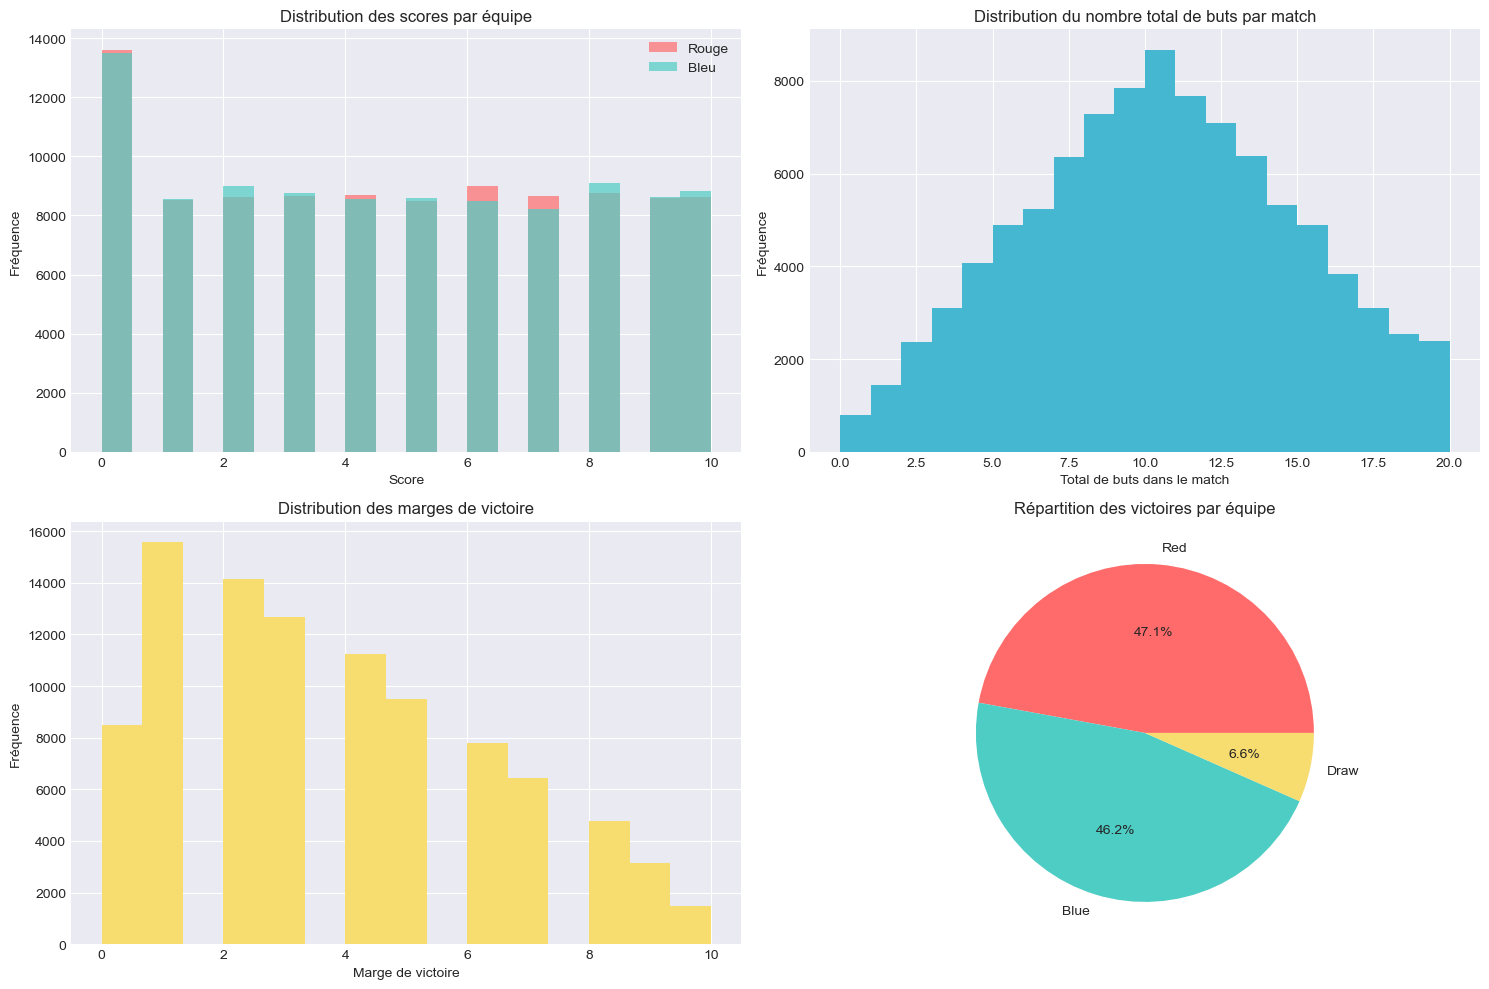


Statistiques des scores:
Score moyen Rouge: 4.76
Score moyen Bleu: 4.76
Total de buts moyen par match: 10.01
Marge de victoire moyenne: 3.65

📋 Colonnes disponibles dans le dataset:
['game_id', 'game_date', 'location', 'table_id', 'table_condition', 'ball_type', 'music_playing', 'referee', 'game_duration', 'final_score_red', 'final_score_blue', 'winner', 'attendance_count', 'season', 'recorded_by', 'rating_raw', 'player_id', 'player_name', 'player_canonical_name', 'player_age', 'player_role', 'player_goals', 'player_own_goals', 'player_assists', 'player_saves', 'possession_time', 'mood', 'player_comment', 'team_color', 'is_substitute', 'ping_ms', 'notes', 'duplicate_flag', 'misc', 'created_at', 'game_date_clean', 'game_duration_clean', 'winner_clean', 'team_color_clean', 'is_substitute_clean', 'rating_clean', 'mood_clean', 'player_age_clean', 'possession_time_seconds', 'victory_margin', 'total_goals', 'game_year', 'game_month', 'game_day_of_week', 'created_at_clean', 'game_hour', 'is_

In [81]:
# PHASE 3 : ANALYSE EXPLORATOIRE DES DONNÉES (EDA)
print("📊 PHASE 3 : ANALYSE EXPLORATOIRE DES DONNÉES (EDA)")
print("="*60)

# Configuration des graphiques
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#F7DC6F', '#BB8FCE']

# Vérifier et créer les colonnes dérivées si nécessaire
print("\n🔧 Création des variables dérivées...")

# Convertir les scores en numérique si ce n'est pas déjà fait
df_clean['final_score_red'] = pd.to_numeric(df_clean['final_score_red'], errors='coerce').fillna(0)
df_clean['final_score_blue'] = pd.to_numeric(df_clean['final_score_blue'], errors='coerce').fillna(0)

# Créer les colonnes dérivées
if 'total_goals' not in df_clean.columns:
    df_clean['total_goals'] = df_clean['final_score_red'] + df_clean['final_score_blue']
    print("✓ Colonne 'total_goals' créée")

if 'victory_margin' not in df_clean.columns:
    df_clean['victory_margin'] = abs(df_clean['final_score_red'] - df_clean['final_score_blue'])
    print("✓ Colonne 'victory_margin' créée")

# Nettoyer la colonne winner si nécessaire
if 'winner_clean' not in df_clean.columns:
    if 'winner' in df_clean.columns:
        df_clean['winner_clean'] = df_clean['winner'].str.strip().str.title()
        # Standardiser les valeurs
        df_clean['winner_clean'] = df_clean['winner_clean'].replace({
            'Rouge': 'Red', 'Bleu': 'Blue', 'Tie': 'Draw', 
            'RED': 'Red', 'BLUE': 'Blue', 'TIE': 'Draw'
        })
    else:
        # Créer winner_clean basé sur les scores
        df_clean['winner_clean'] = 'Unknown'
        df_clean.loc[df_clean['final_score_red'] > df_clean['final_score_blue'], 'winner_clean'] = 'Red'
        df_clean.loc[df_clean['final_score_red'] < df_clean['final_score_blue'], 'winner_clean'] = 'Blue'
        df_clean.loc[df_clean['final_score_red'] == df_clean['final_score_blue'], 'winner_clean'] = 'Draw'
    print("✓ Colonne 'winner_clean' créée")

# 1. ANALYSE UNIVARIÉE - DISTRIBUTION DES SCORES
print("\n\n🎯 1. Distribution des scores")
print("-"*40)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Distribution des scores par équipe
ax1 = axes[0, 0]
df_clean['final_score_red'].hist(bins=20, alpha=0.7, color='#FF6B6B', ax=ax1, label='Rouge')
df_clean['final_score_blue'].hist(bins=20, alpha=0.7, color='#4ECDC4', ax=ax1, label='Bleu')
ax1.set_xlabel('Score')
ax1.set_ylabel('Fréquence')
ax1.set_title('Distribution des scores par équipe')
ax1.legend()

# Distribution du total de buts
ax2 = axes[0, 1]
df_clean['total_goals'].hist(bins=20, color='#45B7D1', ax=ax2)
ax2.set_xlabel('Total de buts dans le match')
ax2.set_ylabel('Fréquence')
ax2.set_title('Distribution du nombre total de buts par match')

# Distribution des marges de victoire
ax3 = axes[1, 0]
df_clean['victory_margin'].hist(bins=15, color='#F7DC6F', ax=ax3)
ax3.set_xlabel('Marge de victoire')
ax3.set_ylabel('Fréquence')
ax3.set_title('Distribution des marges de victoire')

# Répartition des victoires
ax4 = axes[1, 1]
winner_counts = df_clean['winner_clean'].value_counts()
if len(winner_counts) > 0:
    # Adapter les couleurs selon les valeurs présentes
    pie_colors = []
    for winner in winner_counts.index:
        if winner in ['Red', 'Rouge']:
            pie_colors.append('#FF6B6B')
        elif winner in ['Blue', 'Bleu']:
            pie_colors.append('#4ECDC4')
        elif winner in ['Draw', 'Tie']:
            pie_colors.append('#F7DC6F')
        else:
            pie_colors.append('#BB8FCE')
    
    ax4.pie(winner_counts.values, labels=winner_counts.index, autopct='%1.1f%%', colors=pie_colors)
    ax4.set_title('Répartition des victoires par équipe')
else:
    ax4.text(0.5, 0.5, 'Pas de données de victoire disponibles', 
             ha='center', va='center', transform=ax4.transAxes)

plt.tight_layout()
plt.show()

# Statistiques sur les scores
print("\nStatistiques des scores:")
print(f"Score moyen Rouge: {df_clean['final_score_red'].mean():.2f}")
print(f"Score moyen Bleu: {df_clean['final_score_blue'].mean():.2f}")
print(f"Total de buts moyen par match: {df_clean['total_goals'].mean():.2f}")
print(f"Marge de victoire moyenne: {df_clean['victory_margin'].mean():.2f}")

# Afficher les colonnes disponibles pour référence
print("\n📋 Colonnes disponibles dans le dataset:")
print(df_clean.columns.tolist())

## Analyse temporelle



📅 2. Analyse temporelle de l'utilisation
----------------------------------------
🔧 Création des variables temporelles...


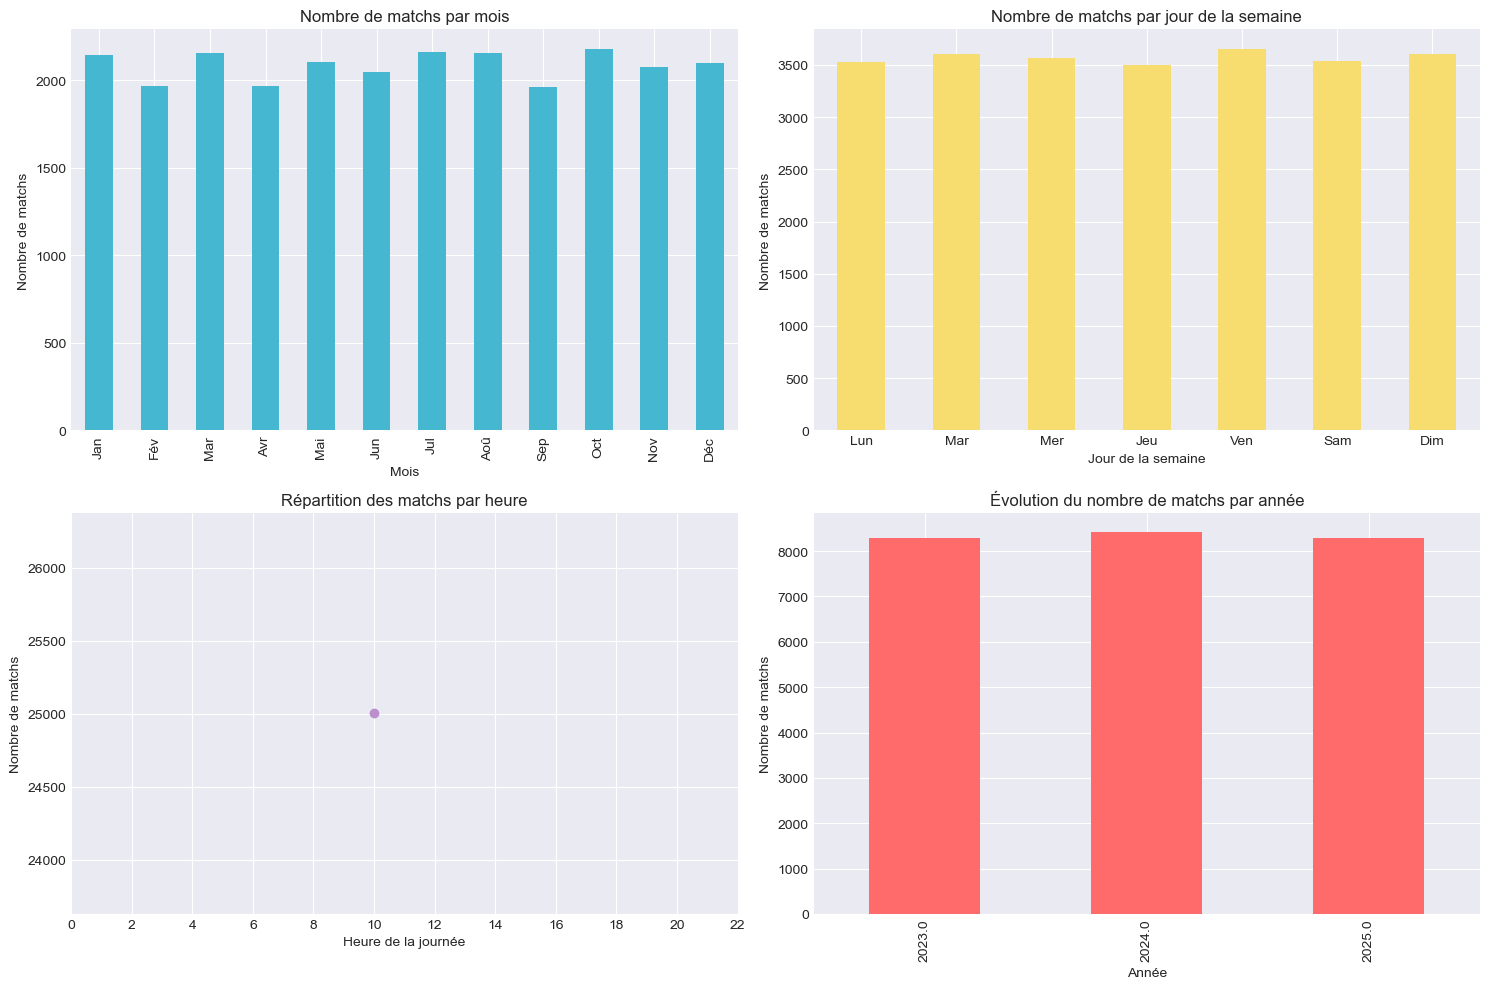


📊 Statistiques temporelles:
Mois le plus actif: Octobre (2180 matchs)
Jour de la semaine le plus actif: Vendredi (3657 matchs)
Heure de pointe: 10h (25002 matchs)

📋 Colonnes temporelles disponibles:
  ✓ game_date (valeurs non-nulles: 100200)
  ✓ game_date_clean (valeurs non-nulles: 100199)
  ✓ game_month (valeurs non-nulles: 100199)
  ✓ game_day_of_week (valeurs non-nulles: 100199)
  ✓ game_hour (valeurs non-nulles: 100198)
  ✓ game_year (valeurs non-nulles: 100199)
  ✓ created_at (valeurs non-nulles: 100200)


In [82]:
# 2. ANALYSE TEMPORELLE (VERSION CORRIGÉE)
print("\n\n📅 2. Analyse temporelle de l'utilisation")
print("-"*40)

# Vérifier et créer les colonnes temporelles si nécessaire
print("🔧 Création des variables temporelles...")

# Chercher la colonne de date
date_column = None
for col in ['game_date_clean', 'game_date', 'date']:
    if col in df_clean.columns:
        date_column = col
        break

if date_column:
    # Convertir en datetime si ce n'est pas déjà fait
    df_clean[date_column] = pd.to_datetime(df_clean[date_column], errors='coerce')
    
    # Créer les colonnes temporelles
    if 'game_month' not in df_clean.columns:
        df_clean['game_month'] = df_clean[date_column].dt.month
        print("✓ Colonne 'game_month' créée")
    
    if 'game_day_of_week' not in df_clean.columns:
        df_clean['game_day_of_week'] = df_clean[date_column].dt.dayofweek
        print("✓ Colonne 'game_day_of_week' créée")
    
    if 'game_year' not in df_clean.columns:
        df_clean['game_year'] = df_clean[date_column].dt.year
        print("✓ Colonne 'game_year' créée")
    
    # Pour l'heure, chercher dans created_at si game_hour n'existe pas
    if 'game_hour' not in df_clean.columns:
        if 'created_at' in df_clean.columns:
            df_clean['created_at_clean'] = pd.to_datetime(df_clean['created_at'], errors='coerce')
            df_clean['game_hour'] = df_clean['created_at_clean'].dt.hour
            print("✓ Colonne 'game_hour' créée depuis 'created_at'")
        else:
            print("⚠️ Pas de colonne horaire disponible")
else:
    print("⚠️ Aucune colonne de date trouvée dans le dataset")

# Créer les graphiques seulement si les données existent
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graphique 1 : Évolution par mois
ax1 = axes[0, 0]
if 'game_month' in df_clean.columns and df_clean['game_month'].notna().sum() > 0:
    monthly_games = df_clean.groupby('game_month')['game_id'].nunique()
    monthly_games.plot(kind='bar', ax=ax1, color='#45B7D1')
    ax1.set_xlabel('Mois')
    ax1.set_ylabel('Nombre de matchs')
    ax1.set_title('Nombre de matchs par mois')
    months_labels = ['Jan', 'Fév', 'Mar', 'Avr', 'Mai', 'Jun', 'Jul', 'Aoû', 'Sep', 'Oct', 'Nov', 'Déc']
    ax1.set_xticklabels([months_labels[int(m)-1] for m in monthly_games.index])
else:
    ax1.text(0.5, 0.5, 'Données mensuelles non disponibles', 
             ha='center', va='center', transform=ax1.transAxes)
    ax1.set_xticks([])
    ax1.set_yticks([])

# Graphique 2 : Répartition par jour de la semaine
ax2 = axes[0, 1]
if 'game_day_of_week' in df_clean.columns and df_clean['game_day_of_week'].notna().sum() > 0:
    daily_games = df_clean.groupby('game_day_of_week')['game_id'].nunique()
    days_labels = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
    daily_games.plot(kind='bar', ax=ax2, color='#F7DC6F')
    ax2.set_xlabel('Jour de la semaine')
    ax2.set_ylabel('Nombre de matchs')
    ax2.set_title('Nombre de matchs par jour de la semaine')
    ax2.set_xticklabels([days_labels[int(d)] for d in daily_games.index], rotation=0)
else:
    ax2.text(0.5, 0.5, 'Données journalières non disponibles', 
             ha='center', va='center', transform=ax2.transAxes)
    ax2.set_xticks([])
    ax2.set_yticks([])

# Graphique 3 : Distribution des heures de jeu
ax3 = axes[1, 0]
if 'game_hour' in df_clean.columns and df_clean['game_hour'].notna().sum() > 0:
    hourly_games = df_clean.groupby('game_hour')['game_id'].nunique()
    hourly_games.plot(kind='line', ax=ax3, color='#BB8FCE', marker='o')
    ax3.set_xlabel('Heure de la journée')
    ax3.set_ylabel('Nombre de matchs')
    ax3.set_title('Répartition des matchs par heure')
    ax3.set_xticks(range(0, 24, 2))
else:
    ax3.text(0.5, 0.5, 'Pas de données horaires disponibles', 
             ha='center', va='center', transform=ax3.transAxes)
    ax3.set_xticks([])
    ax3.set_yticks([])

# Graphique 4 : Évolution par année
ax4 = axes[1, 1]
if 'game_year' in df_clean.columns and df_clean['game_year'].notna().sum() > 0:
    yearly_games = df_clean.groupby('game_year')['game_id'].nunique()
    yearly_games.plot(kind='bar', ax=ax4, color='#FF6B6B')
    ax4.set_xlabel('Année')
    ax4.set_ylabel('Nombre de matchs')
    ax4.set_title('Évolution du nombre de matchs par année')
else:
    ax4.text(0.5, 0.5, 'Données annuelles non disponibles', 
             ha='center', va='center', transform=ax4.transAxes)
    ax4.set_xticks([])
    ax4.set_yticks([])

plt.tight_layout()
plt.show()

# Statistiques temporelles (avec vérifications)
print("\n📊 Statistiques temporelles:")

if 'game_month' in df_clean.columns and len(monthly_games) > 0:
    mois_max = int(monthly_games.idxmax())
    months_names = ['Janvier', 'Février', 'Mars', 'Avril', 'Mai', 'Juin', 
                    'Juillet', 'Août', 'Septembre', 'Octobre', 'Novembre', 'Décembre']
    print(f"Mois le plus actif: {months_names[mois_max-1]} ({monthly_games.max()} matchs)")
else:
    print("Données mensuelles non disponibles")

if 'game_day_of_week' in df_clean.columns and len(daily_games) > 0:
    jour_max_idx = int(daily_games.idxmax())
    days_labels = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
    print(f"Jour de la semaine le plus actif: {days_labels[jour_max_idx]} ({daily_games.max()} matchs)")
else:
    print("Données journalières non disponibles")

if 'game_hour' in df_clean.columns and df_clean['game_hour'].notna().sum() > 0:
    print(f"Heure de pointe: {int(hourly_games.idxmax())}h ({hourly_games.max()} matchs)")
else:
    print("Données horaires non disponibles")

# Debug : afficher les colonnes temporelles disponibles
print("\n📋 Colonnes temporelles disponibles:")
temporal_cols = ['game_date', 'game_date_clean', 'game_month', 'game_day_of_week', 
                 'game_hour', 'game_year', 'created_at']
for col in temporal_cols:
    if col in df_clean.columns:
        print(f"  ✓ {col} (valeurs non-nulles: {df_clean[col].notna().sum()})")

## Analye des performances des joueurs



⚽ 3. Analyse des performances des joueurs
----------------------------------------
Colonne de durée utilisée: game_duration_clean

🏆 TOP 10 DES BUTEURS
----------------------------------------


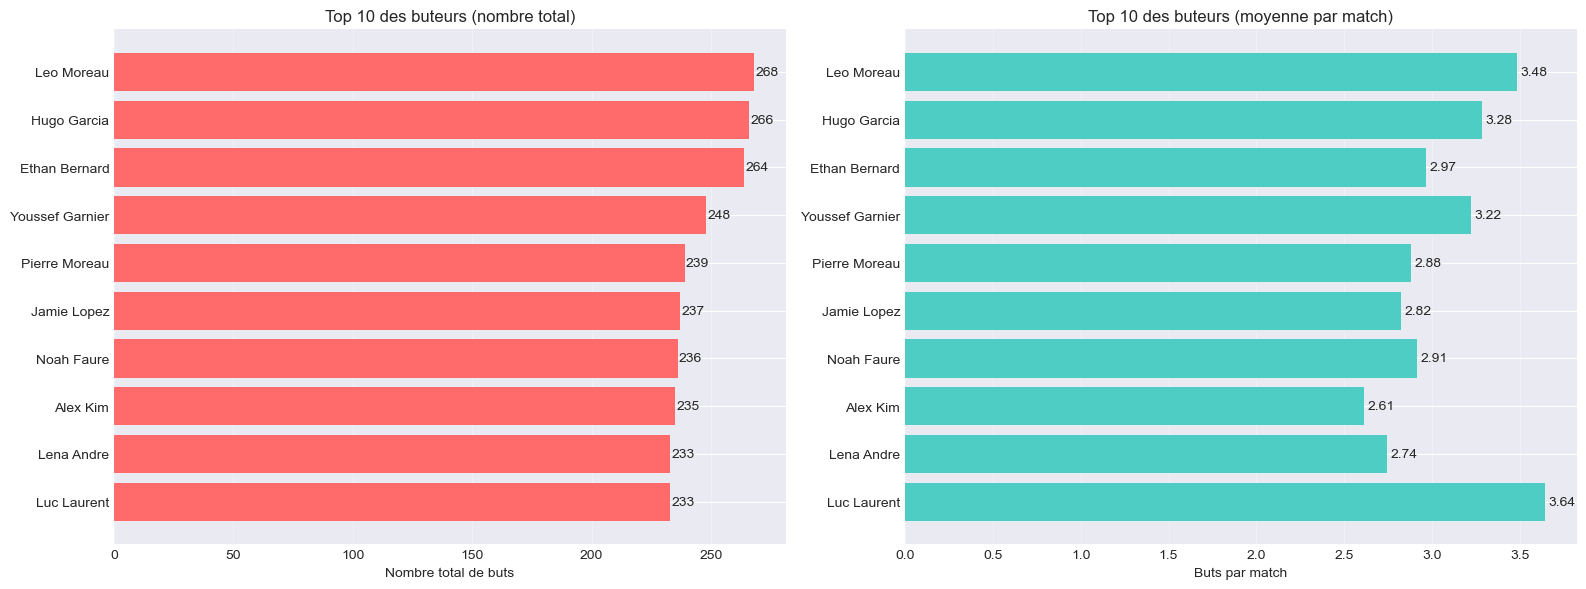


Détail du Top 10 des buteurs:
    player_name  matches_played  total_goals  goals_per_match  goals_per_90min
     Leo Moreau              77        268.0             3.48            17.69
    Hugo Garcia              81        266.0             3.28            17.33
  Ethan Bernard              89        264.0             2.97            15.64
Youssef Garnier              77        248.0             3.22            16.83
  Pierre Moreau              83        239.0             2.88            14.92
    Jamie Lopez              84        237.0             2.82            14.75
     Noah Faure              81        236.0             2.91            15.50
       Alex Kim              90        235.0             2.61            16.46
     Lena Andre              85        233.0             2.74            13.98
    Luc Laurent              64        233.0             3.64            18.23

📋 Colonnes disponibles pour l'analyse des joueurs:
  ✓ player_id (100200 valeurs non-nulles)
  ✓ pl

In [83]:
# 3. ANALYSE DES JOUEURS ET PERFORMANCES
print("\n\n⚽ 3. Analyse des performances des joueurs")
print("-"*40)

# Vérifier quelle colonne de durée est disponible
duration_col = None
for col in ['game_duration_clean', 'game_duration', 'duration']:
    if col in df_clean.columns:
        duration_col = col
        break

print(f"Colonne de durée utilisée: {duration_col if duration_col else 'Aucune'}")

# Préparation des colonnes pour l'agrégation
agg_dict = {
    'game_id': 'count',  # Nombre de matchs joués
    'player_goals': 'sum',
    'player_assists': 'sum',
    'player_saves': 'sum',
    'player_own_goals': 'sum'
}

# Ajouter la durée si disponible
if duration_col:
    agg_dict[duration_col] = 'sum'

# Convertir les colonnes numériques si nécessaire
numeric_cols = ['player_goals', 'player_assists', 'player_saves', 'player_own_goals']
for col in numeric_cols:
    if col in df_clean.columns:
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce').fillna(0)

# Agrégation par joueur
if 'player_name' in df_clean.columns:
    groupby_cols = ['player_id', 'player_name']
else:
    groupby_cols = ['player_id']

player_stats = df_clean.groupby(groupby_cols).agg(agg_dict).reset_index()

# Renommer les colonnes
new_cols = groupby_cols.copy()
new_cols.extend(['matches_played', 'total_goals', 'total_assists', 'total_saves', 'total_own_goals'])
if duration_col:
    new_cols.append('total_minutes')

player_stats.columns = new_cols

# Si pas de colonne player_name, la créer
if 'player_name' not in player_stats.columns:
    player_stats['player_name'] = player_stats['player_id']

# Calculer des métriques dérivées
player_stats['goals_per_match'] = player_stats['total_goals'] / player_stats['matches_played']
player_stats['goals_per_match'] = player_stats['goals_per_match'].fillna(0)

# Calcul goals per 90min seulement si on a la durée
if 'total_minutes' in player_stats.columns:
    # Éviter division par zéro
    player_stats['goals_per_90min'] = player_stats.apply(
        lambda x: (x['total_goals'] / x['total_minutes']) * 90 if x['total_minutes'] > 0 else 0, 
        axis=1
    )
else:
    player_stats['goals_per_90min'] = 0  # Valeur par défaut

# Nettoyer les infinis et NaN
player_stats = player_stats.replace([np.inf, -np.inf], 0)
player_stats = player_stats.fillna(0)

# TOP 10 DES BUTEURS
print("\n🏆 TOP 10 DES BUTEURS")
print("-"*40)

top_scorers = player_stats.nlargest(10, 'total_goals')

# S'assurer qu'on a au moins quelques buteurs
if len(top_scorers) > 0:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Graphique 1: Total de buts
    ax1.barh(top_scorers['player_name'][::-1], top_scorers['total_goals'][::-1], color='#FF6B6B')
    ax1.set_xlabel('Nombre total de buts')
    ax1.set_title('Top 10 des buteurs (nombre total)')
    ax1.grid(True, alpha=0.3, axis='x')
    
    # Ajouter les valeurs sur les barres
    for i, (name, goals) in enumerate(zip(top_scorers['player_name'][::-1], top_scorers['total_goals'][::-1])):
        ax1.text(goals + 0.5, i, f'{int(goals)}', va='center')
    
    # Graphique 2: Buts par match
    ax2.barh(top_scorers['player_name'][::-1], top_scorers['goals_per_match'][::-1], color='#4ECDC4')
    ax2.set_xlabel('Buts par match')
    ax2.set_title('Top 10 des buteurs (moyenne par match)')
    ax2.grid(True, alpha=0.3, axis='x')
    
    # Ajouter les valeurs sur les barres
    for i, (name, avg) in enumerate(zip(top_scorers['player_name'][::-1], top_scorers['goals_per_match'][::-1])):
        ax2.text(avg + 0.02, i, f'{avg:.2f}', va='center')
    
    plt.tight_layout()
    plt.show()
    
    # Afficher le tableau détaillé
    print("\nDétail du Top 10 des buteurs:")
    
    # Préparer les colonnes à afficher
    display_cols = ['player_name', 'matches_played', 'total_goals', 'goals_per_match']
    if 'goals_per_90min' in player_stats.columns and player_stats['goals_per_90min'].sum() > 0:
        display_cols.append('goals_per_90min')
    
    # Formater l'affichage
    top_scorers_display = top_scorers[display_cols].copy()
    top_scorers_display['goals_per_match'] = top_scorers_display['goals_per_match'].round(2)
    if 'goals_per_90min' in top_scorers_display.columns:
        top_scorers_display['goals_per_90min'] = top_scorers_display['goals_per_90min'].round(2)
    
    print(top_scorers_display.to_string(index=False))
else:
    print("⚠️ Aucune donnée de buteur disponible")

# Debug : afficher les colonnes disponibles
print("\n📋 Colonnes disponibles pour l'analyse des joueurs:")
relevant_cols = ['player_id', 'player_name', 'player_goals', 'player_assists', 
                 'player_saves', 'game_duration_clean', 'game_duration']
for col in relevant_cols:
    if col in df_clean.columns:
        non_null = df_clean[col].notna().sum()
        print(f"  ✓ {col} ({non_null} valeurs non-nulles)")

## Analyse des defenseurs



🛡️ 4. Analyse des meilleurs défenseurs
----------------------------------------
Nombre de lignes de défenseurs trouvées: 57358


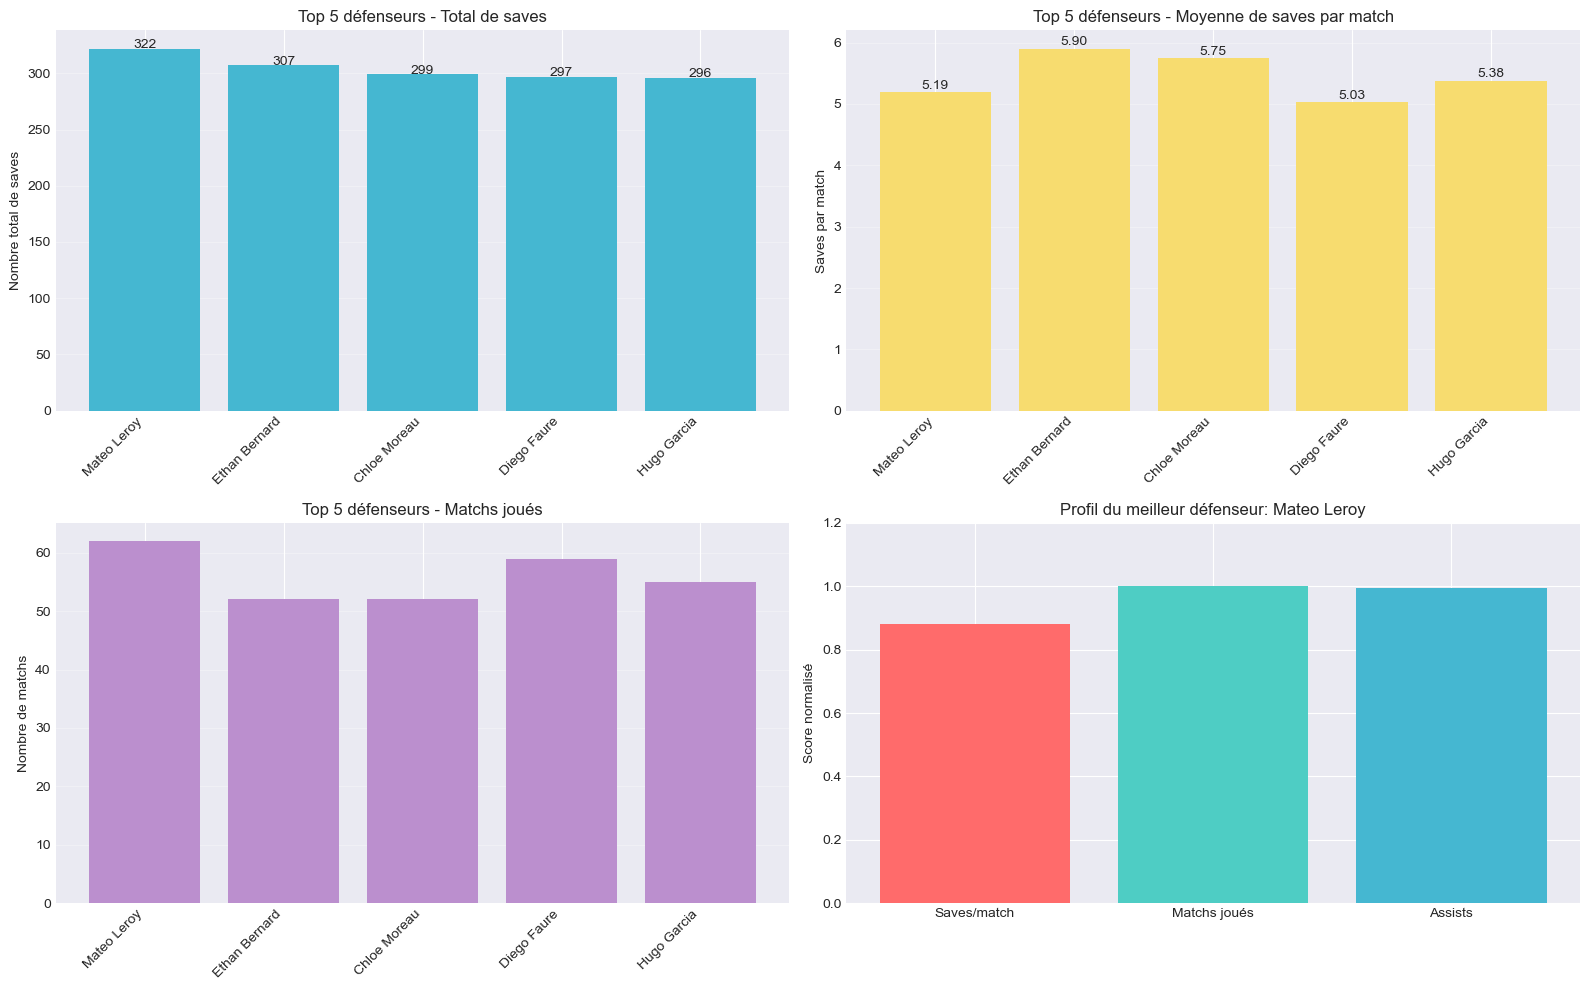


📊 Détail du Top 5 des défenseurs:
--------------------------------------------------------------------------------
  player_name  matches_played  total_saves  saves_per_match  saves_per_90min  goals_scored  assists
  Mateo Leroy              62          322             5.19           106.15         146.0    145.0
Ethan Bernard              52          307             5.90           113.70         164.0    120.0
 Chloe Moreau              52          299             5.75           124.58         135.0    122.0
  Diego Faure              59          297             5.03            87.93         140.0    146.0
  Hugo Garcia              55          296             5.38            94.80         182.0    136.0

📋 Informations disponibles pour l'analyse des défenseurs:
  ✓ player_role (100200 valeurs non-nulles)
  ✓ player_saves (100200 valeurs non-nulles)
  ✓ player_name (100200 valeurs non-nulles)
  ✓ game_duration_clean (100199 valeurs non-nulles)


In [84]:
# 4. TOP 5 DES DÉFENSEURS
print("\n\n🛡️ 4. Analyse des meilleurs défenseurs")
print("-"*40)

# Vérifier quelle colonne de nom de joueur utiliser
name_col = 'player_name_clean' if 'player_name_clean' in df_clean.columns else 'player_name'

# Vérifier si la colonne player_role existe
if 'player_role' not in df_clean.columns:
    print("⚠️ Colonne 'player_role' non trouvée - impossible de filtrer les défenseurs")
    defenders = df_clean  # Utiliser tout le dataset
else:
    # Filtrer seulement les joueurs qui ont joué en défense
    defenders = df_clean[df_clean['player_role'].str.lower().str.contains('def', na=False)]
    print(f"Nombre de lignes de défenseurs trouvées: {len(defenders)}")

# Si aucun défenseur trouvé, utiliser tout le dataset
if len(defenders) == 0:
    print("⚠️ Aucun défenseur identifié - analyse sur tous les joueurs")
    defenders = df_clean

# Déterminer quelle colonne de durée utiliser
duration_col = None
for col in ['game_duration_clean', 'game_duration', 'duration']:
    if col in defenders.columns:
        duration_col = col
        break

# Préparer le dictionnaire d'agrégation
agg_dict = {
    'game_id': 'count',
    'player_saves': 'sum',
    'player_goals': 'sum',
    'player_assists': 'sum',
    'final_score_blue': 'sum',
    'final_score_red': 'sum'
}

# Ajouter la durée si disponible
if duration_col:
    agg_dict[duration_col] = 'sum'

# Vérifier que les colonnes existent avant l'agrégation
agg_dict_clean = {}
for col, func in agg_dict.items():
    if col in defenders.columns:
        agg_dict_clean[col] = func

# Grouper par joueur
groupby_cols = ['player_id']
if name_col in defenders.columns:
    groupby_cols.append(name_col)

# Agrégation des stats des défenseurs
defender_stats = defenders.groupby(groupby_cols).agg(agg_dict_clean).reset_index()

# Renommer les colonnes en fonction de ce qui a été agrégé
new_column_names = groupby_cols.copy()
if 'game_id' in agg_dict_clean:
    new_column_names.append('matches_played')
if 'player_saves' in agg_dict_clean:
    new_column_names.append('total_saves')
if 'player_goals' in agg_dict_clean:
    new_column_names.append('goals_scored')
if 'player_assists' in agg_dict_clean:
    new_column_names.append('assists')
if duration_col and duration_col in agg_dict_clean:
    new_column_names.append('total_minutes')
if 'final_score_blue' in agg_dict_clean:
    new_column_names.append('goals_against_blue')
if 'final_score_red' in agg_dict_clean:
    new_column_names.append('goals_against_red')

defender_stats.columns = new_column_names

# Si pas de colonne player_name, utiliser player_id
if 'player_name' not in defender_stats.columns:
    defender_stats['player_name'] = defender_stats['player_id']

# Métriques dérivées pour les défenseurs (avec vérifications)
if 'total_saves' in defender_stats.columns and 'matches_played' in defender_stats.columns:
    defender_stats['saves_per_match'] = defender_stats['total_saves'] / defender_stats['matches_played']
    defender_stats['saves_per_match'] = defender_stats['saves_per_match'].fillna(0)
else:
    defender_stats['saves_per_match'] = 0

if 'total_saves' in defender_stats.columns and 'total_minutes' in defender_stats.columns:
    defender_stats['saves_per_90min'] = defender_stats.apply(
        lambda x: (x['total_saves'] / x['total_minutes']) * 90 if x.get('total_minutes', 0) > 0 else 0, 
        axis=1
    )
else:
    defender_stats['saves_per_90min'] = 0

# Nettoyer les infinis et NaN
defender_stats = defender_stats.replace([np.inf, -np.inf], 0)
defender_stats = defender_stats.fillna(0)

# TOP 5 DES DÉFENSEURS
if 'total_saves' in defender_stats.columns and len(defender_stats) > 0:
    top_defenders = defender_stats.nlargest(5, 'total_saves')
    
    # S'assurer qu'on a au moins quelques défenseurs avec des saves
    if len(top_defenders) > 0 and top_defenders['total_saves'].sum() > 0:
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Limiter au nombre réel de défenseurs disponibles
        n_defenders = min(5, len(top_defenders))
        
        # Graphique 1: Total de saves
        ax1 = axes[0, 0]
        ax1.bar(range(n_defenders), top_defenders['total_saves'][:n_defenders], color='#45B7D1')
        ax1.set_xticks(range(n_defenders))
        ax1.set_xticklabels(top_defenders['player_name'][:n_defenders], rotation=45, ha='right')
        ax1.set_ylabel('Nombre total de saves')
        ax1.set_title(f'Top {n_defenders} défenseurs - Total de saves')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Ajouter les valeurs
        for i, saves in enumerate(top_defenders['total_saves'][:n_defenders]):
            ax1.text(i, saves + 0.5, f'{int(saves)}', ha='center')
        
        # Graphique 2: Saves par match
        ax2 = axes[0, 1]
        ax2.bar(range(n_defenders), top_defenders['saves_per_match'][:n_defenders], color='#F7DC6F')
        ax2.set_xticks(range(n_defenders))
        ax2.set_xticklabels(top_defenders['player_name'][:n_defenders], rotation=45, ha='right')
        ax2.set_ylabel('Saves par match')
        ax2.set_title(f'Top {n_defenders} défenseurs - Moyenne de saves par match')
        ax2.grid(True, alpha=0.3, axis='y')
        
        # Ajouter les valeurs
        for i, avg in enumerate(top_defenders['saves_per_match'][:n_defenders]):
            ax2.text(i, avg + 0.05, f'{avg:.2f}', ha='center')
        
        # Graphique 3: Nombre de matchs joués
        ax3 = axes[1, 0]
        if 'matches_played' in top_defenders.columns:
            ax3.bar(range(n_defenders), top_defenders['matches_played'][:n_defenders], color='#BB8FCE')
            ax3.set_xticks(range(n_defenders))
            ax3.set_xticklabels(top_defenders['player_name'][:n_defenders], rotation=45, ha='right')
            ax3.set_ylabel('Nombre de matchs')
            ax3.set_title(f'Top {n_defenders} défenseurs - Matchs joués')
            ax3.grid(True, alpha=0.3, axis='y')
        
        # Graphique 4: Performance du meilleur défenseur
        ax4 = axes[1, 1]
        if len(top_defenders) > 0:
            top_defender = top_defenders.iloc[0]
            
            # Créer des métriques normalisées
            metrics = []
            values = []
            
            if 'saves_per_match' in top_defenders.columns and top_defenders['saves_per_match'].max() > 0:
                metrics.append('Saves/match')
                values.append(top_defender['saves_per_match'] / top_defenders['saves_per_match'].max())
            
            if 'matches_played' in top_defenders.columns and top_defenders['matches_played'].max() > 0:
                metrics.append('Matchs joués')
                values.append(top_defender['matches_played'] / top_defenders['matches_played'].max())
            
            if 'assists' in top_defenders.columns and top_defenders['assists'].max() > 0:
                metrics.append('Assists')
                values.append(top_defender['assists'] / top_defenders['assists'].max())
            
            if len(metrics) > 0:
                ax4.bar(range(len(metrics)), values, color=['#FF6B6B', '#4ECDC4', '#45B7D1'][:len(metrics)])
                ax4.set_xticks(range(len(metrics)))
                ax4.set_xticklabels(metrics)
                ax4.set_ylim(0, 1.2)
                ax4.set_title(f'Profil du meilleur défenseur: {top_defender["player_name"]}')
                ax4.set_ylabel('Score normalisé')
        
        plt.tight_layout()
        plt.show()
        
        # Tableau détaillé
        print("\n📊 Détail du Top 5 des défenseurs:")
        print("-"*80)
        
        # Colonnes à afficher (seulement celles qui existent)
        display_cols = ['player_name', 'matches_played', 'total_saves', 'saves_per_match']
        available_cols = [col for col in display_cols if col in top_defenders.columns]
        
        if 'saves_per_90min' in top_defenders.columns and top_defenders['saves_per_90min'].sum() > 0:
            available_cols.append('saves_per_90min')
        if 'goals_scored' in top_defenders.columns:
            available_cols.append('goals_scored')
        if 'assists' in top_defenders.columns:
            available_cols.append('assists')
        
        print(top_defenders[available_cols].round(2).to_string(index=False))
    else:
        print("⚠️ Aucun défenseur avec des saves trouvé")
else:
    print("⚠️ Impossible de calculer les statistiques des défenseurs - colonnes manquantes")

# Debug : afficher les informations disponibles
print("\n📋 Informations disponibles pour l'analyse des défenseurs:")
for col in ['player_role', 'player_saves', 'player_name', 'player_name_clean', duration_col]:
    if col and col in df_clean.columns:
        non_null = df_clean[col].notna().sum()
        print(f"  ✓ {col} ({non_null} valeurs non-nulles)")

## influence du camp choisi sur les résultats



🔴🔵 5. Analyse : Le choix du camp influence-t-il le résultat ?
------------------------------------------------------------

📊 Répartition des victoires:
  Red: 11233 victoires (47.1%)
  Blue: 11027 victoires (46.3%)
  Draw: 1577 victoires (6.6%)

🔬 Test statistique Chi-carré:
  Chi² = 1.9064
  p-value = 0.1674
  ❌ Résultat non significatif : Le camp NE SEMBLE PAS influencer le résultat


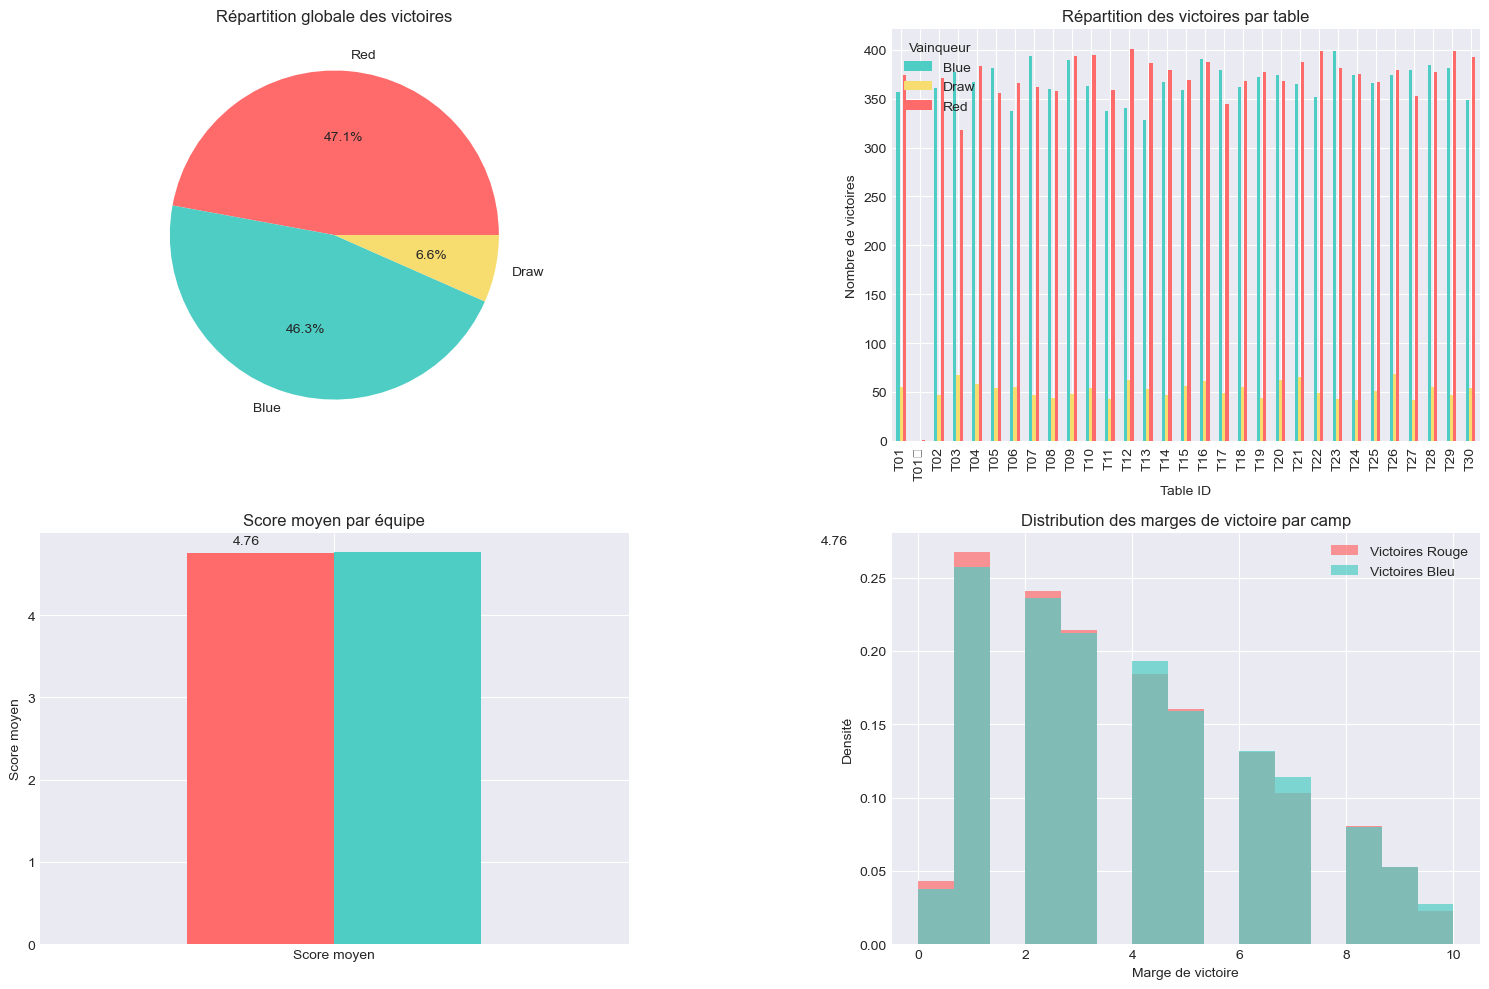


📍 Analyse par lieu de jeu:
winner_clean           Blue  Draw   Red
location                               
Bar Le Foos            45.5   7.4  47.1
Cafeteria (1st floor)  46.6   7.7  45.7
Campus - Cafeteria     46.2   6.8  47.0
Gym Hall               46.3   6.1  47.6
Lab 204                47.8   5.9  46.3
Salle Polyvalente      45.4   6.0  48.6
Student House          46.2   5.9  47.9
Ynov - Bâtiment A      47.7   6.8  45.6
Ynov Tls               44.7   6.9  48.4
Ynov Toulouse          46.2   6.6  47.2


In [85]:
# 5. ANALYSE DE L'INFLUENCE DU CAMP SUR LES RÉSULTATS
print("\n\n🔴🔵 5. Analyse : Le choix du camp influence-t-il le résultat ?")
print("-"*60)

# Créer un dataset au niveau des matchs (pas des joueurs)
match_results = df_clean.groupby('game_id').agg({
    'winner_clean': 'first',
    'final_score_red': 'first',
    'final_score_blue': 'first',
    'game_duration_clean': 'first',
    'location': 'first',
    'table_id': 'first'
}).reset_index()

# Calculer les statistiques par camp
camp_stats = match_results['winner_clean'].value_counts()
total_matches = len(match_results[match_results['winner_clean'].notna()])

print("\n📊 Répartition des victoires:")
for camp, count in camp_stats.items():
    percentage = (count / total_matches) * 100
    print(f"  {camp}: {count} victoires ({percentage:.1f}%)")

# Test statistique (Chi-carré)
from scipy import stats

# Créer une table de contingence
# H0: Le camp n'influence pas le résultat (50-50 pour Rouge et Bleu)
victories_red = camp_stats.get('Red', 0)
victories_blue = camp_stats.get('Blue', 0)
draws = camp_stats.get('Draw', 0)

# Test pour Rouge vs Bleu uniquement (excluant les matchs nuls)
observed = [victories_red, victories_blue]
expected = [(victories_red + victories_blue) / 2, (victories_red + victories_blue) / 2]

chi2, p_value = stats.chisquare(observed, expected)

print(f"\n🔬 Test statistique Chi-carré:")
print(f"  Chi² = {chi2:.4f}")
print(f"  p-value = {p_value:.4f}")

if p_value < 0.05:
    print("  ✅ Résultat significatif : Le camp SEMBLE influencer le résultat")
else:
    print("  ❌ Résultat non significatif : Le camp NE SEMBLE PAS influencer le résultat")

# Visualisations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Graphique 1: Répartition des victoires
ax1 = axes[0, 0]
colors_pie = {'Red': '#FF6B6B', 'Blue': '#4ECDC4', 'Draw': '#F7DC6F'}
camp_stats.plot(kind='pie', ax=ax1, autopct='%1.1f%%', 
                colors=[colors_pie.get(x, '#888888') for x in camp_stats.index])
ax1.set_ylabel('')
ax1.set_title('Répartition globale des victoires')

# Graphique 2: Victoires par table
ax2 = axes[0, 1]
table_victories = pd.crosstab(match_results['table_id'], match_results['winner_clean'])
table_victories.plot(kind='bar', ax=ax2, color=['#4ECDC4', '#F7DC6F', '#FF6B6B'])
ax2.set_xlabel('Table ID')
ax2.set_ylabel('Nombre de victoires')
ax2.set_title('Répartition des victoires par table')
ax2.legend(title='Vainqueur')

# Graphique 3: Score moyen par camp
ax3 = axes[1, 0]
avg_scores = pd.DataFrame({
    'Rouge': [match_results['final_score_red'].mean()],
    'Bleu': [match_results['final_score_blue'].mean()]
})
avg_scores.plot(kind='bar', ax=ax3, color=['#FF6B6B', '#4ECDC4'], legend=False)
ax3.set_ylabel('Score moyen')
ax3.set_title('Score moyen par équipe')
ax3.set_xticklabels(['Score moyen'], rotation=0)

# Ajouter les valeurs
for i, (col, val) in enumerate(avg_scores.items()):
    ax3.text(i-0.15, val[0] + 0.1, f'{val[0]:.2f}', ha='center')

# Graphique 4: Distribution des marges de victoire par camp gagnant
ax4 = axes[1, 1]
red_wins = match_results[match_results['winner_clean'] == 'Red']['final_score_red'] - match_results[match_results['winner_clean'] == 'Red']['final_score_blue']
blue_wins = match_results[match_results['winner_clean'] == 'Blue']['final_score_blue'] - match_results[match_results['winner_clean'] == 'Blue']['final_score_red']

ax4.hist(red_wins, alpha=0.7, bins=15, color='#FF6B6B', label='Victoires Rouge', density=True)
ax4.hist(blue_wins, alpha=0.7, bins=15, color='#4ECDC4', label='Victoires Bleu', density=True)
ax4.set_xlabel('Marge de victoire')
ax4.set_ylabel('Densité')
ax4.set_title('Distribution des marges de victoire par camp')
ax4.legend()

plt.tight_layout()
plt.show()

# Analyse complémentaire : par location
print("\n📍 Analyse par lieu de jeu:")
location_analysis = pd.crosstab(match_results['location'], match_results['winner_clean'], normalize='index') * 100
print(location_analysis.round(1).head(10))

## heures de pointe et d'utilisation des tables 



🕐 6. Analyse des heures de pointe et utilisation des babyfoots
------------------------------------------------------------


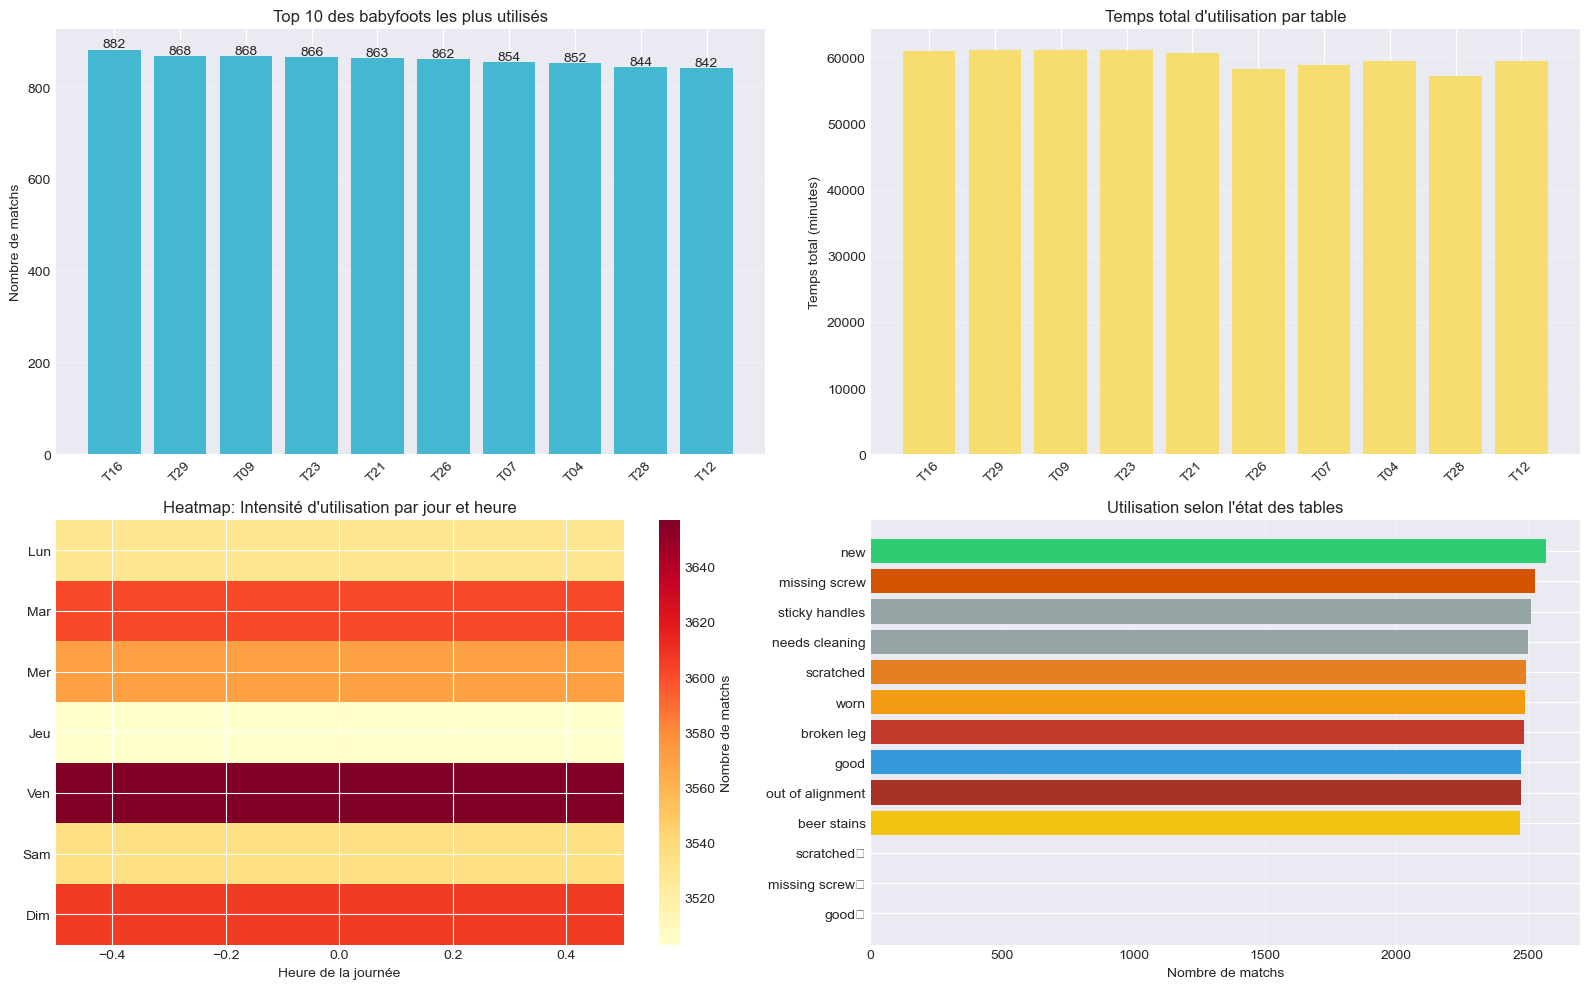


📊 INSIGHTS BUSINESS CLÉS:
----------------------------------------

1. UTILISATION DES TABLES:
   - Table la plus utilisée: T16 (882 matchs)
   - Temps moyen par match: 66.6 minutes

2. HEURES DE POINTE:
   - Heure la plus active: 10.0h (25002 matchs)
   - Période creuse: 10.0h (25002 matchs)

3. MAINTENANCE RECOMMANDÉE:
   - Tables nécessitant maintenance: T26, T20, T03, T22, T08

4. ENGAGEMENT DES JOUEURS:
   - Joueurs réguliers (10+ matchs): 3627
   - Taux de joueurs réguliers: 65.7%


In [29]:
# 6. ANALYSE DES HEURES DE POINTE ET UTILISATION DES TABLES
print("\n\n🕐 6. Analyse des heures de pointe et utilisation des babyfoots")
print("-"*60)

# Utilisation des tables
table_usage = df_clean.groupby('table_id').agg({
    'game_id': 'nunique',
    'game_duration_clean': 'sum',
    'player_id': 'count'
}).reset_index()

table_usage.columns = ['table_id', 'nb_matchs', 'temps_total_utilisation', 'nb_joueurs_total']
table_usage['temps_moyen_par_match'] = table_usage['temps_total_utilisation'] / table_usage['nb_matchs']
table_usage = table_usage.sort_values('nb_matchs', ascending=False)

# Top 10 des tables les plus utilisées
top_tables = table_usage.head(10)

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Graphique 1: Tables les plus utilisées (nombre de matchs)
ax1 = axes[0, 0]
ax1.bar(range(10), top_tables['nb_matchs'], color='#45B7D1')
ax1.set_xticks(range(10))
ax1.set_xticklabels(top_tables['table_id'], rotation=45)
ax1.set_ylabel('Nombre de matchs')
ax1.set_title('Top 10 des babyfoots les plus utilisés')
ax1.grid(True, alpha=0.3, axis='y')

# Ajouter les valeurs
for i, val in enumerate(top_tables['nb_matchs']):
    ax1.text(i, val + 5, f'{val}', ha='center')

# Graphique 2: Temps d'utilisation total
ax2 = axes[0, 1]
ax2.bar(range(10), top_tables['temps_total_utilisation'], color='#F7DC6F')
ax2.set_xticks(range(10))
ax2.set_xticklabels(top_tables['table_id'], rotation=45)
ax2.set_ylabel('Temps total (minutes)')
ax2.set_title('Temps total d\'utilisation par table')
ax2.grid(True, alpha=0.3, axis='y')

# Graphique 3: Heatmap des heures de jeu par jour
ax3 = axes[1, 0]

# Créer une matrice jour x heure si on a des données horaires
if df_clean['game_hour'].notna().sum() > 0:
    # Compter les matchs par jour et heure
    heatmap_data = df_clean.groupby(['game_day_of_week', 'game_hour'])['game_id'].nunique().reset_index()
    heatmap_pivot = heatmap_data.pivot(index='game_day_of_week', columns='game_hour', values='game_id').fillna(0)
    
    # Créer la heatmap
    im = ax3.imshow(heatmap_pivot, cmap='YlOrRd', aspect='auto')
    
    # Labels
    ax3.set_yticks(range(7))
    ax3.set_yticklabels(['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim'])
    ax3.set_xlabel('Heure de la journée')
    ax3.set_title('Heatmap: Intensité d\'utilisation par jour et heure')
    
    # Colorbar
    cbar = plt.colorbar(im, ax=ax3)
    cbar.set_label('Nombre de matchs')
else:
    ax3.text(0.5, 0.5, 'Pas de données horaires pour la heatmap', 
             ha='center', va='center', transform=ax3.transAxes)
    ax3.set_xticks([])
    ax3.set_yticks([])

# Graphique 4: État des tables vs utilisation
ax4 = axes[1, 1]

# Analyser l'état des tables
table_condition_usage = df_clean.groupby('table_condition')['game_id'].nunique()
condition_colors = {
    'new': '#2ECC71',
    'good': '#3498DB', 
    'worn': '#F39C12',
    'scratched': '#E67E22',
    'broken': '#E74C3C',
    'broken leg': '#C0392B',
    'missing screw': '#D35400',
    'out of alignment': '#A93226',
    'beer stains': '#F1C40F'
}

sorted_conditions = table_condition_usage.sort_values(ascending=True)
colors_list = [condition_colors.get(cond, '#95A5A6') for cond in sorted_conditions.index]

ax4.barh(range(len(sorted_conditions)), sorted_conditions.values, color=colors_list)
ax4.set_yticks(range(len(sorted_conditions)))
ax4.set_yticklabels(sorted_conditions.index)
ax4.set_xlabel('Nombre de matchs')
ax4.set_title('Utilisation selon l\'état des tables')
ax4.grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

# Statistiques clés pour le business
print("\n📊 INSIGHTS BUSINESS CLÉS:")
print("-"*40)

print("\n1. UTILISATION DES TABLES:")
print(f"   - Table la plus utilisée: {top_tables.iloc[0]['table_id']} ({top_tables.iloc[0]['nb_matchs']} matchs)")
print(f"   - Temps moyen par match: {table_usage['temps_moyen_par_match'].mean():.1f} minutes")

print("\n2. HEURES DE POINTE:")
if df_clean['game_hour'].notna().sum() > 0:
    hourly_activity = df_clean.groupby('game_hour')['game_id'].nunique()
    peak_hour = hourly_activity.idxmax()
    print(f"   - Heure la plus active: {peak_hour}h ({hourly_activity.max()} matchs)")
    print(f"   - Période creuse: {hourly_activity.idxmin()}h ({hourly_activity.min()} matchs)")

print("\n3. MAINTENANCE RECOMMANDÉE:")
poor_condition = ['broken', 'broken leg', 'missing screw', 'out of alignment']
tables_need_maintenance = df_clean[df_clean['table_condition'].isin(poor_condition)]['table_id'].unique()
print(f"   - Tables nécessitant maintenance: {', '.join(tables_need_maintenance[:5])}")

print("\n4. ENGAGEMENT DES JOUEURS:")
regular_players = player_stats[player_stats['matches_played'] >= 10]
print(f"   - Joueurs réguliers (10+ matchs): {len(regular_players)}")
print(f"   - Taux de joueurs réguliers: {len(regular_players)/len(player_stats)*100:.1f}%")

## Analyse bivariéé



📊 7. ANALYSES BIVARIÉES - CORRÉLATIONS ENTRE VARIABLES
Colonnes numériques disponibles pour l'analyse: 14


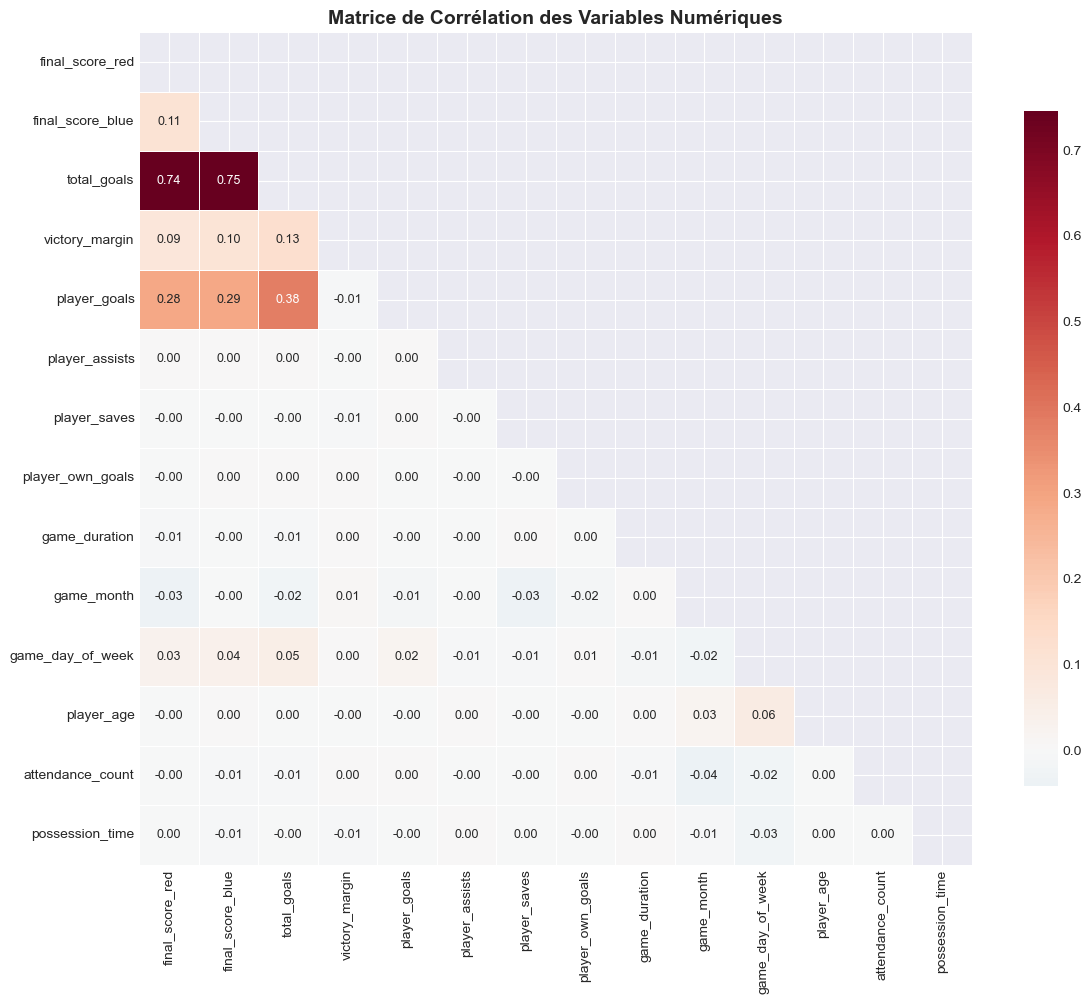

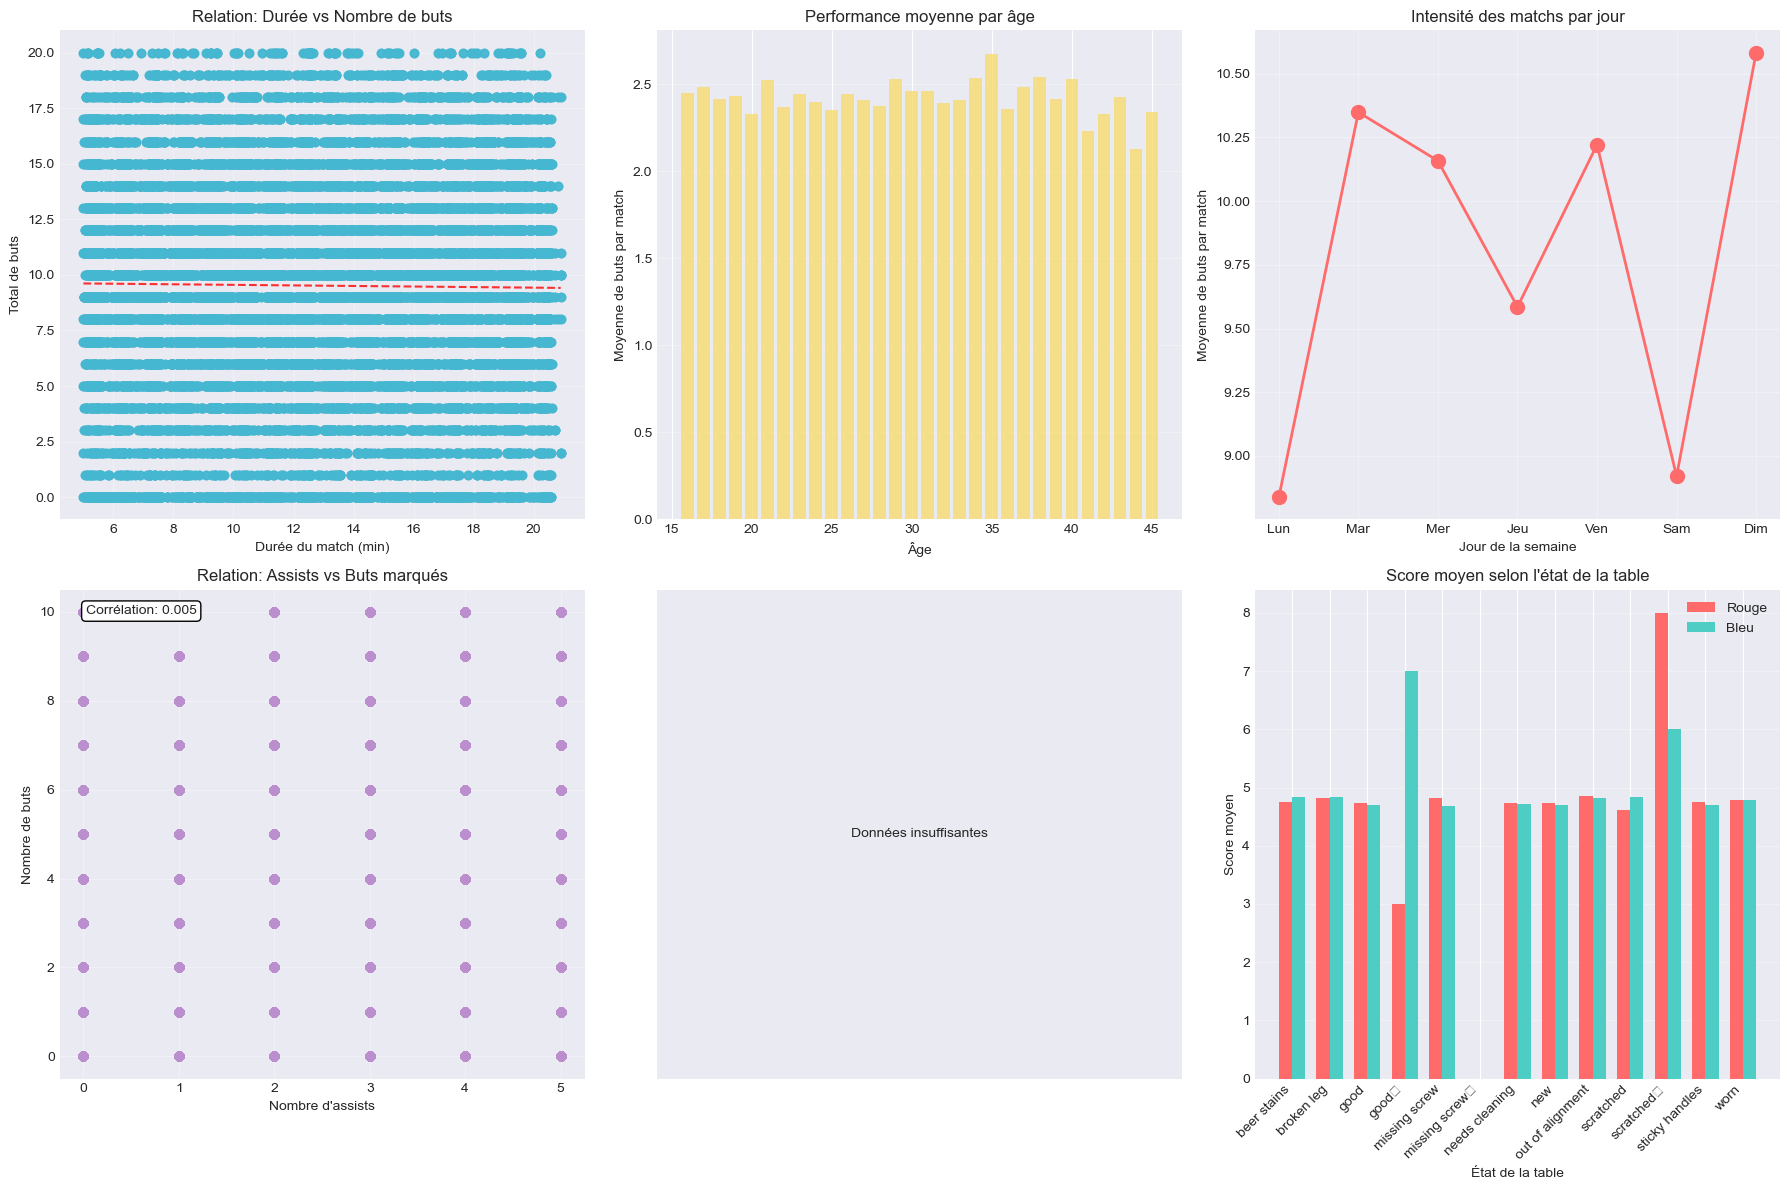


📈 CORRÉLATIONS LES PLUS SIGNIFICATIVES:
--------------------------------------------------
  ↗️ final_score_blue ⟷ total_goals: 0.746
  ↗️ final_score_red ⟷ total_goals: 0.743
  ↗️ total_goals ⟷ player_goals: 0.384

💡 INSIGHTS BUSINESS DES ANALYSES BIVARIÉES:
--------------------------------------------------
  • Corrélation buts/durée: -0.008
  • Corrélation âge/performance: -0.003
    → Âge optimal pour marquer: 35 ans


In [59]:
# 7. ANALYSES BIVARIÉES ET CORRÉLATIONS
print("\n\n📊 7. ANALYSES BIVARIÉES - CORRÉLATIONS ENTRE VARIABLES")
print("="*60)

# Préparer les données pour l'analyse des corrélations
# Sélectionner uniquement les colonnes numériques pertinentes
numeric_cols = []
potential_cols = [
    'final_score_red', 'final_score_blue', 'total_goals', 'victory_margin',
    'player_goals', 'player_assists', 'player_saves', 'player_own_goals',
    'game_duration', 'game_month', 'game_day_of_week', 'game_hour',
    'player_age', 'attendance_count', 'possession_time'
]

# Vérifier quelles colonnes existent et sont numériques
for col in potential_cols:
    if col in df_clean.columns:
        # Convertir en numérique si nécessaire
        df_clean[col] = pd.to_numeric(df_clean[col], errors='coerce')
        if df_clean[col].notna().sum() > 10:  # Au moins 10 valeurs non-nulles
            numeric_cols.append(col)

print(f"Colonnes numériques disponibles pour l'analyse: {len(numeric_cols)}")

if len(numeric_cols) >= 2:
    # 1. MATRICE DE CORRÉLATION
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_clean[numeric_cols].corr()
    
    # Heatmap des corrélations
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, cmap='RdBu_r', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
                annot=True, fmt='.2f', annot_kws={'size': 9})
    plt.title('Matrice de Corrélation des Variables Numériques', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # 2. ANALYSES BIVARIÉES SPÉCIFIQUES
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    # Analyse 1: Score vs Durée du match
    ax1 = axes[0]
    if 'total_goals' in df_clean.columns and 'game_duration' in df_clean.columns:
        valid_data = df_clean[['total_goals', 'game_duration']].dropna()
        if len(valid_data) > 10:
            ax1.scatter(valid_data['game_duration'], valid_data['total_goals'], 
                       alpha=0.5, color='#45B7D1')
            z = np.polyfit(valid_data['game_duration'], valid_data['total_goals'], 1)
            p = np.poly1d(z)
            ax1.plot(valid_data['game_duration'].sort_values(), 
                    p(valid_data['game_duration'].sort_values()), 
                    "r--", alpha=0.8)
            ax1.set_xlabel('Durée du match (min)')
            ax1.set_ylabel('Total de buts')
            ax1.set_title('Relation: Durée vs Nombre de buts')
            ax1.grid(True, alpha=0.3)
    
    # Analyse 2: Performance par âge
    ax2 = axes[1]
    if 'player_age' in df_clean.columns and 'player_goals' in df_clean.columns:
        age_performance = df_clean.groupby('player_age').agg({
            'player_goals': 'mean',
            'player_id': 'count'
        }).reset_index()
        age_performance = age_performance[age_performance['player_id'] >= 5]  # Au moins 5 joueurs
        
        if len(age_performance) > 0:
            ax2.bar(age_performance['player_age'], age_performance['player_goals'], 
                   color='#F7DC6F', alpha=0.8)
            ax2.set_xlabel('Âge')
            ax2.set_ylabel('Moyenne de buts par match')
            ax2.set_title('Performance moyenne par âge')
            ax2.grid(True, alpha=0.3, axis='y')
    
    # Analyse 3: Jour de la semaine vs Score total
    ax3 = axes[2]
    if 'game_day_of_week' in df_clean.columns and 'total_goals' in df_clean.columns:
        daily_scores = df_clean.groupby('game_day_of_week')['total_goals'].mean()
        days_labels = ['Lun', 'Mar', 'Mer', 'Jeu', 'Ven', 'Sam', 'Dim']
        
        if len(daily_scores) > 0:
            ax3.plot(daily_scores.index, daily_scores.values, 
                    marker='o', color='#FF6B6B', markersize=10, linewidth=2)
            ax3.set_xticks(range(7))
            ax3.set_xticklabels([days_labels[int(i)] for i in daily_scores.index if i < 7])
            ax3.set_xlabel('Jour de la semaine')
            ax3.set_ylabel('Moyenne de buts par match')
            ax3.set_title('Intensité des matchs par jour')
            ax3.grid(True, alpha=0.3)
    
    # Analyse 4: Relation Buts vs Assists
    ax4 = axes[3]
    if 'player_goals' in df_clean.columns and 'player_assists' in df_clean.columns:
        valid_data = df_clean[['player_goals', 'player_assists']].dropna()
        if len(valid_data) > 10:
            ax4.scatter(valid_data['player_assists'], valid_data['player_goals'], 
                       alpha=0.3, color='#BB8FCE')
            ax4.set_xlabel('Nombre d\'assists')
            ax4.set_ylabel('Nombre de buts')
            ax4.set_title('Relation: Assists vs Buts marqués')
            ax4.grid(True, alpha=0.3)
            
            # Ajouter la corrélation
            corr = valid_data['player_goals'].corr(valid_data['player_assists'])
            ax4.text(0.05, 0.95, f'Corrélation: {corr:.3f}', 
                    transform=ax4.transAxes, bbox=dict(boxstyle='round', facecolor='white'))
    
    # Analyse 5: Heure du jour vs Durée des matchs
    ax5 = axes[4]
    if 'game_hour' in df_clean.columns and 'game_duration' in df_clean.columns:
        hourly_duration = df_clean.groupby('game_hour')['game_duration'].mean()
        
        if len(hourly_duration) > 0:
            ax5.bar(hourly_duration.index, hourly_duration.values, 
                   color='#2ECC71', alpha=0.8)
            ax5.set_xlabel('Heure de la journée')
            ax5.set_ylabel('Durée moyenne (min)')
            ax5.set_title('Durée des matchs selon l\'heure')
            ax5.grid(True, alpha=0.3, axis='y')
    
    # Analyse 6: Score par équipe selon l'état de la table
    ax6 = axes[5]
    if 'table_condition' in df_clean.columns:
        condition_scores = df_clean.groupby('table_condition').agg({
            'final_score_red': 'mean',
            'final_score_blue': 'mean'
        }).reset_index()
        
        if len(condition_scores) > 0:
            x = np.arange(len(condition_scores))
            width = 0.35
            
            ax6.bar(x - width/2, condition_scores['final_score_red'], 
                   width, label='Rouge', color='#FF6B6B')
            ax6.bar(x + width/2, condition_scores['final_score_blue'], 
                   width, label='Bleu', color='#4ECDC4')
            
            ax6.set_xlabel('État de la table')
            ax6.set_ylabel('Score moyen')
            ax6.set_title('Score moyen selon l\'état de la table')
            ax6.set_xticks(x)
            ax6.set_xticklabels(condition_scores['table_condition'], rotation=45, ha='right')
            ax6.legend()
            ax6.grid(True, alpha=0.3, axis='y')
    
    # Ajuster l'espacement
    for i, ax in enumerate(axes):
        if not ax.has_data():
            ax.text(0.5, 0.5, 'Données insuffisantes', 
                   ha='center', va='center', transform=ax.transAxes)
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.tight_layout()
    plt.show()
    
    # 3. CORRÉLATIONS LES PLUS SIGNIFICATIVES
    print("\n📈 CORRÉLATIONS LES PLUS SIGNIFICATIVES:")
    print("-"*50)
    
    # Extraire les corrélations fortes (> 0.3 ou < -0.3)
    strong_corr = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = correlation_matrix.iloc[i, j]
            if abs(corr_value) > 0.3 and not np.isnan(corr_value):
                strong_corr.append({
                    'Variable 1': correlation_matrix.columns[i],
                    'Variable 2': correlation_matrix.columns[j],
                    'Corrélation': corr_value
                })
    
    if strong_corr:
        strong_corr_df = pd.DataFrame(strong_corr)
        strong_corr_df = strong_corr_df.sort_values('Corrélation', key=abs, ascending=False)
        
        for _, row in strong_corr_df.iterrows():
            if row['Corrélation'] > 0:
                print(f"  ↗️ {row['Variable 1']} ⟷ {row['Variable 2']}: {row['Corrélation']:.3f}")
            else:
                print(f"  ↘️ {row['Variable 1']} ⟷ {row['Variable 2']}: {row['Corrélation']:.3f}")
    else:
        print("  Aucune corrélation forte détectée (|r| > 0.3)")
    
    # 4. INSIGHTS BUSINESS DES CORRÉLATIONS
    print("\n💡 INSIGHTS BUSINESS DES ANALYSES BIVARIÉES:")
    print("-"*50)
    
    if 'total_goals' in df_clean.columns and 'game_duration' in df_clean.columns:
        corr_goals_duration = df_clean[['total_goals', 'game_duration']].corr().iloc[0, 1]
        if not np.isnan(corr_goals_duration):
            print(f"  • Corrélation buts/durée: {corr_goals_duration:.3f}")
            if corr_goals_duration > 0.3:
                print("    → Les matchs plus longs ont tendance à avoir plus de buts")
            elif corr_goals_duration < -0.3:
                print("    → Les matchs courts sont souvent plus intenses")
    
    if 'player_age' in df_clean.columns and 'player_goals' in df_clean.columns:
        age_goal_corr = df_clean[['player_age', 'player_goals']].corr().iloc[0, 1]
        if not np.isnan(age_goal_corr):
            print(f"  • Corrélation âge/performance: {age_goal_corr:.3f}")
            optimal_age = df_clean.groupby('player_age')['player_goals'].mean().idxmax()
            print(f"    → Âge optimal pour marquer: {int(optimal_age)} ans")
else:
    print("⚠️ Pas assez de colonnes numériques pour l'analyse des corrélations")